In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

import warnings

## --- ignorar avisos Pandas --- ##
warnings.filterwarnings('ignore')


# from google.colab import drive
# drive.mount('/content/drive')

link país = https://www.gov.br/produtividade-e-comercio-exterior/pt-br/balanca/bd/tabelas/PAIS.csv/view

link bases - https://www.cnpuv.embrapa.br/vitibrazil/index.php?opcao=opt_02

countries = https://developers.google.com/public-data/docs/canonical/countries_csv

In [2]:

## -- Arquivos base -- ##

# Exportação
exp_vinho = '../data/doc/ExpVinho.csv'
exp_espumante = '../data/doc/ExpEspumantes.csv'
exp_suco = '../data/doc/ExpSuco.csv'
exp_uva = '../data/doc/ExpUva.csv'

# importação
imp_espumante = '../data/doc/ImpEspumantes.csv'
imp_frescas = '../data/doc/ImpFrescas.csv'
imp_passas = '../data/doc/ImpPassas.csv'
imp_suco = '../data/doc/ImpSuco.csv'
imp_vinhos = '../data/doc/ImpVinhos.csv'

# Processamento
processa_americanas = '../data/doc/ProcessaAmericanas.csv'
processa_mesa = '../data/doc/ProcessaMesa.csv'
processa_sem_class = '../data/doc/ProcessaSemclass.csv'
processa_viniferas = '../data/doc/ProcessaViniferas.csv'

# produção
producao = '../data/doc/Producao.csv'

# Comercialização
comercio = '../data/doc/Comercio.csv'

# paises e continentes
pais = '../data/doc/pais.csv'
pais_geral = '../data/doc/info_geral_paises.csv'

# cotacao dolar análise
cotacao = '../data/doc/cotacao_dolar_ano.xlsx'

# demográfico da população
populacao = '../data/doc/WPP2022_Demographic_Indicators_Medium.csv'


## -- Dataframes -- ##

# Exportação
df_exp_vinho = pd.read_csv(exp_vinho, delimiter=';')
df_exp_espumante = pd.read_csv(exp_espumante, delimiter=';')
df_exp_suco = pd.read_csv(exp_suco, delimiter=';')
df_exp_uva = pd.read_csv(exp_uva, delimiter=';')

# importação
df_imp_vinhos = pd.read_csv(imp_vinhos, delimiter=';')
df_imp_espumante = pd.read_csv(imp_espumante, delimiter=';')
df_imp_frescas = pd.read_csv(imp_frescas, delimiter=';')
df_imp_passas = pd.read_csv(imp_passas, delimiter=';')
df_imp_suco = pd.read_csv(imp_suco, delimiter=';')

# Processamento
df_processa_viniferas = pd.read_csv(processa_viniferas, delimiter='\t')
df_processa_americanas = pd.read_csv(processa_americanas, delimiter=';')
df_processa_mesa = pd.read_csv(processa_mesa, delimiter=';')
df_processa_sem_class = pd.read_csv(processa_sem_class, delimiter=';')

# produção
df_producao = pd.read_csv(producao, delimiter=';')

# Comercialização
df_comercio = pd.read_csv(comercio, delimiter=';')

# base país
df_pais = pd.read_csv(pais, delimiter=';', encoding='latin-1')
df_pais_geral = pd.read_csv(pais_geral, delimiter=';', encoding='latin-1')

# df demográfico da população
df_populacao = pd.read_csv(populacao, delimiter=',')

# base cotação dolar
df_cotacao = pd.read_excel(cotacao)

In [4]:
### --- tabela populacao --- ##

filtro_tab = ['Time','Location', 'ISO3_code', 'TPopulation1Jan', 'MedianAgePop', 'PopDensity', 'PopSexRatio']
df_populacao_filtro = df_populacao[filtro_tab]

# renomeando colunas
df_populacao_filtro.columns = 'ano', 'pais_ing', 'iso_code', 'populacao', 'idade_mediana', 'densidade_populacional', 'sexo_populacional'

# filtro e tratamento dos dados
df_populacao_geral = df_populacao_filtro[(df_populacao_filtro['iso_code'].notnull()) & (df_populacao_filtro['ano'] < 2023)]
df_populacao_geral

,ano,pais_ing,iso_code,populacao,idade_mediana,densidade_populacional,sexo_populacional
3648,1950,Burundi,BDI,2229.322,18.3147,86.8637,91.9472
3649,1951,Burundi,BDI,2278.903,18.0842,88.7571,92.1448
3650,1952,Burundi,BDI,2327.593,17.8744,90.6179,92.3191
3651,1953,Burundi,BDI,2375.478,17.6693,92.4508,92.4880
3652,1954,Burundi,BDI,2422.721,17.4706,94.2874,92.6503
...,...,...,...,...,...,...,...
43388,2018,Wallis and Futuna Islands,WLF,11.870,34.3973,84.3964,93.3006
43389,2019,Wallis and Futuna Islands,WLF,11.761,34.9624,83.6714,93.1091
43390,2020,Wallis and Futuna Islands,WLF,11.667,35.4533,83.2464,92.9553
43391,2021,Wallis and Futuna Islands,WLF,11.642,35.8358,83.0536,92.7476


#### Comercio

In [4]:
df_comercio.columns

Index(['0', 'ANO', 'ANO.1', '1970', '1971', '1972', '1973', '1974', '1975',
       '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984',
       '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993',
       '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020',
       '2021'],
      dtype='object')

In [12]:
df_comercio['ANO.1'].unique()

array(['VINHO DE MESA', '  Tinto', '  Rosado', '  Branco',
       'VINHO  FINO DE MESA', 'VINHO FRIZANTE', 'VINHO ORGÂNICO',
       'VINHO ESPECIAL', 'ESPUMANTES ', '  Espumante  Moscatel',
       '  Espumante', '  Espumante Orgânico', 'SUCO DE UVAS',
       '   Suco Natural Integral', '   Suco Reprocessado/reconstituido',
       '   Suco Orgânico', '   Outros sucos de uvas',
       'SUCO DE UVAS CONCENTRADO', 'OUTROS PRODUTOS COMERCIALIZADOS',
       '  Outros vinhos (sem informação detalhada)',
       '  Agrin (fermentado, acetico misto)',
       '  Aguardente de vinho 50°gl', '  Alcool vinico',
       '  Bagaceira (graspa)', '  Base champenoise champanha',
       '  Base charmat champanha', '  Base espumante moscatel',
       '  Bebida de uva', '  Borra líquida', '  Borra seca',
       '  Brandy (conhaque)', '  Cooler', '  Coquetel com vinho',
       '  Destilado de vinho', '  Filtrado doce', '  Jeropiga',
       '  Mistelas', '  Mosto concentrado', '  Mosto de uva',
       '  Mosto

In [15]:
# df_comercio.loc[df_comercio['ANO'] == 'VINHO DE MESA']
df_comercio.loc[df_comercio['ANO.1'] == '  Tinto']

,0,ANO,ANO.1,1970,1971,1972,1973,1974,1975,1976,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
1,2,vm_Tinto,Tinto,83300735,98522869,101167932,98196747,77167303,91528090,116407222,...,173964776,188033494,178250072,182028785,146646365,154309442,155115499,158519218,189573423,185653678
5,6,vm_Tinto,Tinto,435354,428927,624499,783508,1616144,2050960,4450570,...,15443016,19121750,15354938,15572632,15228514,12021684,11150517,11433702,18202453,19337862
11,12,ve_Tinto,Tinto,4730346,4802828,4347706,5017487,3763509,4815235,4819463,...,239,2257,7231,593,331,0,0,0,0,0


In [ ]:
['VINHO DE MESA', 'VINHO  FINO DE MESA', 'VINHO FRIZANTE', 'VINHO ORGÂNICO', 'VINHO ESPECIAL', 'ESPUMANTES ']

In [30]:
df_comercioV1 = df_comercio.drop(columns={'0', 'ANO'})
df_comercioV1 = df_comercioV1.rename(columns={'ANO.1': 'ANO'})
df_comercioV2 = df_comercioV1.set_index('ANO')
# df_comercioV2.groupby('ANO').sum()
df_comercioV2.loc['ANO']

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
ANO,,,,,,,,,,,,,,,,,,,,,
VINHO DE MESA,98327606,114399031,118377367,116617910,94173324,108031792,139238614,140813114,141293379,149609112,...,206969571,221590810,206404427,209198468,166769622,176059959,177186273,180446489,215557931,210012238
Tinto,83300735,98522869,101167932,98196747,77167303,91528090,116407222,116609545,117203914,119496652,...,173964776,188033494,178250072,182028785,146646365,154309442,155115499,158519218,189573423,185653678
Rosado,107681,542274,7770851,8425617,8891367,7261777,11748047,15195525,14612454,18643308,...,1738134,1777648,1419855,1409002,1391942,1097426,1972944,1265435,1394901,1931606
Branco,14919190,15333888,9438584,9995546,8114654,9241925,11083345,9008044,9477011,11469152,...,31266661,31779668,26734500,25760681,18731315,20653091,20097830,20661836,24589607,22426954
VINHO FINO DE MESA,4430629,4840369,5602091,7202830,7571802,8848303,14095648,14975330,17596956,21695829,...,22469950,27912934,20424983,20141631,19630158,15874354,14826143,15684588,24310834,27080445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vinho base para espumantes,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Vinho composto,3386173,3645774,3921573,4168841,3670736,3493104,5429800,5170582,5649977,976174,...,510914,595513,450121,413735,377685,485944,249165,366549,63625,227116
Vinho licoroso,3013056,2475632,2407816,2443944,1921867,2205036,2474364,3027434,3094302,2531379,...,645341,609153,616904,510975,546189,496746,491165,465964,362340,376597


In [ ]:
# https://medium.com/grupo-32/an%C3%A1lise-sobre-a-exporta%C3%A7%C3%A3o-de-vinhos-no-brasil-0d9858104c67#:~:text=Paraguai%2C%20R%C3%BAssia%20e%20Estados%20Unidos,volume%20(L)%20das%20exporta%C3%A7%C3%B5es.

# O Rio Grande do Sul continua sendo o Estado que concentra a maior parte das exportações brasileiras, com 92,5% do valor total, seguido por São Paulo e Paraná. Os espumantes continuam mostrando seu potencial e oportunidade de crescimento nos Estados Unidos, destino de 87% das exportações dessa categoria e que registrou crescimento de 57% em volume e 53% em valor. Já os vinhos tranquilos continuam tendo o Paraguai como principal destino, com 79% das exportações.


# Crescimento do Mercado de Vinhos: O setor vitivinícola brasileiro, que inclui o Paraguai como um dos principais destinos de exportação, tem registrado crescimento significativo. Em 2019, por exemplo, houve um aumento de 66,75% em valor nas exportações de vinhos e espumantes brasileiros em comparação com o ano anterior.


#### Total Vinho

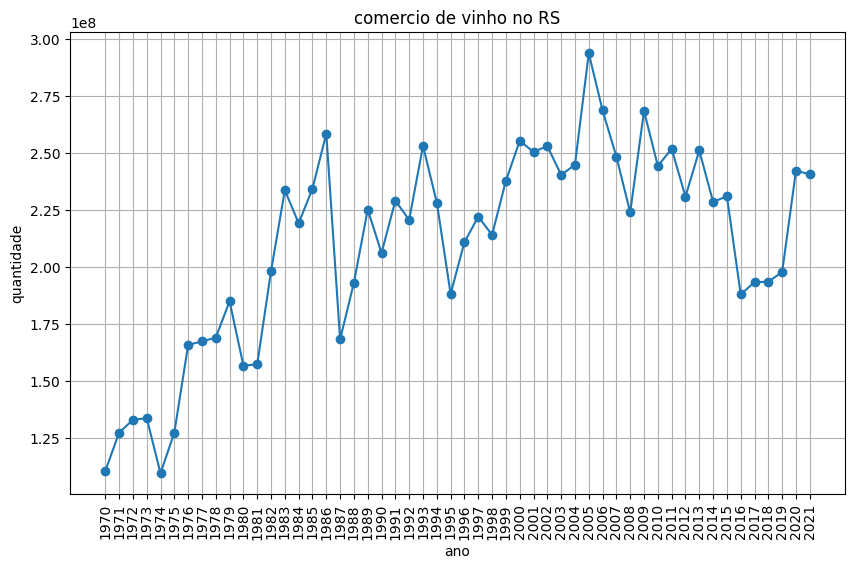

In [5]:

df_comercio_vinho = df_comercio.drop([df_comercio.columns[0], df_comercio.columns[2]], axis=1)
df_comercio_vinho.set_index('ANO', inplace=True)

df_comercio_vinho_grafico = df_comercio_vinho.transpose()
df_comercio_vinho_grafico = df_comercio_vinho_grafico.iloc[:, :15]

df_comercio_vinho_grafico['Total Vinho'] = (df_comercio_vinho_grafico['VINHO  FINO DE MESA'] +
                                            df_comercio_vinho_grafico['VINHO DE MESA'] + 
                                            df_comercio_vinho_grafico['VINHO ESPECIAL'] + 
                                            df_comercio_vinho_grafico['VINHO FRIZANTE'] + 
                                            df_comercio_vinho_grafico['VINHO ORGÂNICO'])

plt.figure(figsize=(10, 6))
plt.plot(df_comercio_vinho_grafico.index, df_comercio_vinho_grafico['Total Vinho'], marker='o')
plt.xticks(rotation=90)
plt.grid(True)
plt.title('comercio de vinho no RS')
plt.xlabel('ano')
plt.ylabel('quantidade')
plt.show()

#### <font color=pink> Tabela Exp_vinho </font>

In [6]:
df_exp_vinho_qtde = df_exp_vinho.drop(columns={'Id'})

# Filtrar colunas de quantidade e valor
colunas_qtde = [col for col in df_exp_vinho_qtde.columns if not col.endswith('.1')]
colunas_valor = [col for col in df_exp_vinho_qtde.columns if col.endswith('.1')]

# Assegurar que 'País' não seja incluído nas somas
colunas_qtde.remove('País')

# Calcular a soma das quantidades e valores
df_exp_vinho_qtde['qtde_total'] = df_exp_vinho_qtde[colunas_qtde].sum(axis=1)
df_exp_vinho_qtde['valor_total'] = df_exp_vinho_qtde[colunas_valor].sum(axis=1)

df_exp_vinho_qtde.head()


,País,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,1974,...,2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1,qtde_total,valor_total
0,Afeganistão,0,0,0,0,0,0,0,0,0,...,0,0,0,0,11,46,0,0,11,46
1,África do Sul,0,0,0,0,0,0,0,0,0,...,26,95,4,21,0,0,0,0,493,1789
2,"Alemanha, República Democrática",0,0,0,0,4168,2630,12000,8250,0,...,3660,25467,6261,32605,2698,6741,7630,45367,1206001,3121585
3,Angola,0,0,0,0,0,0,0,0,0,...,345,1065,0,0,0,0,4068,4761,5819857,4859836
4,Anguilla,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,454,186


In [7]:
df_exp_vinho_qtde[['País', 'valor_total']].sort_values(by='valor_total', ascending=False).head(10)

,País,valor_total
97,Paraguai,85606168
48,Estados Unidos,71504688
105,Rússia,25914397
103,Reino Unido,8317001
75,Japão,7043882
3,Angola,4859836
28,China,4778033
95,Países Baixos,4287747
47,Espanha,3867723
2,"Alemanha, República Democrática",3121585


In [8]:
df_exp_vinho_qtde[['País', 'qtde_total','valor_total']].sort_values(by=['qtde_total','valor_total'], ascending=False)

,País,qtde_total,valor_total
97,Paraguai,115543747,85606168
48,Estados Unidos,55258958,71504688
105,Rússia,39808014,25914397
75,Japão,8198936,7043882
3,Angola,5819857,4859836
...,...,...,...
111,Suazilândia,10,24
84,Mauritânia,9,85
33,Comores,9,25
69,Indonésia,5,6


In [9]:
########## Tabela destino e Origem #################

# Lista de colunas que não são 'País', 'qtde_total' ou 'valor_total'
colunas_anos = [col for col in df_exp_vinho_qtde.columns if col not in ['País', 'qtde_total', 'valor_total']]

# Aplicando o melt
df_melted = df_exp_vinho_qtde.melt(id_vars='País', value_vars=colunas_anos, var_name='Ano', value_name='Valor')

# # Separando 'Ano' em 'Ano' e 'Tipo'
df_melted['Tipo'] = df_melted['Ano'].str.endswith('.1')
df_melted['Ano'] = df_melted['Ano'].astype(str).str.replace(r'\.1$', '', regex=True)

# # Pivotando o DataFrame para ter colunas separadas para quantidade e valor total
df_pivot = df_melted.pivot_table(index=['País', 'Ano'], columns='Tipo', values='Valor').reset_index()

df_pivot.fillna(0.0, inplace=True)

# df_pivot['Ano'] = df_pivot['Ano'].astype(str).str.replace(r'\.1$', '', regex=True)

# # Renomeando as colunas
df_pivot.columns = ['País', 'Ano', 'Litros', 'Valor']

# # Exibindo o DataFrame resultante
df_pivot['Origem'] = 'Brasíl'
filtro = ['Origem', 'País', 'Ano', 'Litros', 'Valor']
df_filtrado = df_pivot[filtro]
df_filtrado.columns = ['Origem', 'Destino', 'Ano', 'Litros', 'Valor']
df_filtrado

,Origem,Destino,Ano,Litros,Valor
0,Brasíl,Afeganistão,1970,0,0
1,Brasíl,Afeganistão,1971,0,0
2,Brasíl,Afeganistão,1972,0,0
3,Brasíl,Afeganistão,1973,0,0
4,Brasíl,Afeganistão,1974,0,0
...,...,...,...,...,...
6779,Brasíl,Áustria,2018,0,0
6780,Brasíl,Áustria,2019,0,0
6781,Brasíl,Áustria,2020,0,0
6782,Brasíl,Áustria,2021,0,0


In [9]:
df_filtrado[df_filtrado['Destino'] == 'Paraguai']['Valor'].sum()

85606168

In [10]:
df_melted[(df_melted['País'] == 'Paraguai') & (df_melted['Ano'].isin(colunas_qtde)) ]['Valor'].sum()

201149915

In [11]:
df_melted[(df_melted['País'] == 'Paraguai') & (df_melted['Tipo'] == True)]['Valor'].sum()

85606168

In [12]:
df_melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13568 entries, 0 to 13567
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   País    13568 non-null  object
 1   Ano     13568 non-null  object
 2   Valor   13568 non-null  int64 
 3   Tipo    13568 non-null  bool  
dtypes: bool(1), int64(1), object(2)
memory usage: 331.4+ KB


#### <font color=green> Tabela exportação </font>

In [10]:

# Função para classificar com base no índice
def classificar(index):
    if str(index).endswith('.1'):
        return 'valor'
    else:
        return 'quantidade'
    

In [11]:
df_exp_vinho_tab = df_exp_vinho_qtde
# filtro das colunas sem total 
df_exp_vinho_tab = df_exp_vinho_tab.iloc[:, :-2]
# renomeis o índice para Ano
df_exp_vinho_tab = df_exp_vinho_tab.rename(columns={'País':'Ano'})
# seta o índice para o ano
df_exp_vinho_tab = df_exp_vinho_tab.set_index('Ano')
# faz o transpose da tabela
df_exp_vinho_tab = df_exp_vinho_tab.T

# criação da coluna 'total_geral'
df_exp_vinho_tab['total_geral'] = df_exp_vinho_tab.sum(axis=1)
# cria uma classificação para 'quantidade' e para 'valor'
df_exp_vinho_tab['classe'] = df_exp_vinho_tab.index.map(classificar)
# alteração do índice do tipo string retirando o '.1'
df_exp_vinho_tab.index = df_exp_vinho_tab.index.map(lambda x: x.replace('.1', ''))
df_exp_vinho_tab

Ano,Afeganistão,África do Sul,"Alemanha, República Democrática",Angola,Anguilla,Antígua e Barbuda,Antilhas Holandesas,Argentina,Aruba,Austrália,...,Trinidade Tobago,Tunísia,Turquia,Tuvalu,Uruguai,Vanuatu,Venezuela,Vietnã,total_geral,classe
1970,0,0,0,0,0,0,280,0,0,0,...,0,0,0,0,0,0,0,0,136009,quantidade
1970,0,0,0,0,0,0,207,0,0,0,...,0,0,0,0,0,0,0,0,40500,valor
1971,0,0,0,0,0,0,4800,0,0,0,...,0,0,0,0,0,0,3200,0,281305,quantidade
1971,0,0,0,0,0,0,3705,0,0,0,...,0,0,0,0,0,0,2000,0,83465,valor
1972,0,0,4168,0,0,0,3000,0,0,0,...,0,0,0,0,0,0,1350,0,381020,quantidade
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020,0,21,32605,0,0,1864,0,4176,0,3413,...,0,0,0,4,0,31,9808,584,6078288,valor
2021,11,0,2698,0,0,805,0,6,0,705,...,0,0,343,0,136774,0,26415,0,8058704,quantidade
2021,46,0,6741,0,0,2268,0,13,0,4034,...,0,0,878,0,149842,0,35944,0,9851942,valor
2022,0,0,7630,4068,0,419,0,480,0,1424,...,0,0,418,0,637117,0,23220,130,7025983,quantidade


In [12]:
df_exp_total_por_ano = df_exp_vinho_tab[df_exp_vinho_tab['classe'] == 'valor'][['total_geral']].astype(int)
df_exp_total_por_ano.head()

Ano,total_geral
1970,40500
1971,83465
1972,121097
1973,174792
1974,185871


In [13]:
df_pais_valor = df_exp_vinho_tab[df_exp_vinho_tab['classe'] == 'valor']
df_pais_valor = df_pais_valor.drop(columns={'total_geral','classe'})
df_pais_valor = df_pais_valor.T
df_pais_valor['valor_total'] = df_pais_valor.sum(axis=1)
df_pais_valortotal = df_pais_valor[['valor_total']]
df_pais_valortotal.reset_index(inplace=True)
df_pais_valortotal = df_pais_valortotal.rename(columns={'Ano':'pais'})
df_pais_valortotal.head()

,pais,valor_total
0,Afeganistão,46
1,África do Sul,1789
2,"Alemanha, República Democrática",3121585
3,Angola,4859836
4,Anguilla,186


#### <font color=orange> df_pais </font>

In [14]:
df_pais_geral.columns = ['pais', 'iso_code', 'pais_ing', 'continent', 'cod_iso3']
filtro_paisgeral = ['pais', 'iso_code', 'continent']
df_pais_geralv1 = df_pais_geral[filtro_paisgeral]
df_pais_geralv1

,pais,iso_code,continent
0,Angola,AGO,África
1,Cabo Verde,CPV,África
2,Camarões,CMR,África
3,Comores,COM,África
4,Congo,COG,África
...,...,...,...
275,A Designar,ZZZ,Sem informação
276,Bancos Centrais,ZZZ,Sem informação
277,Organizações Internacionais,ZZZ,Sem informação
278,Sem informação,ZZZ,Sem informação


In [15]:
df_pais

,CO_PAIS,CO_PAIS_ISON3,CO_PAIS_ISOA3,NO_PAIS,NO_PAIS_ING,NO_PAIS_ESP
0,0,898,ZZZ,Não Definido,Not defined,No definido
1,13,4,AFG,Afeganistão,Afghanistan,Afganistan
2,15,248,ALA,"Aland, Ilhas",Aland Islands,"Alans, Islas"
3,17,8,ALB,Albânia,Albania,Albania
4,20,724,ESP,"Alboran-Perejil, Ilhas","Alboran-Perejil, Islands","Alboran-Perejil, Islas"
...,...,...,...,...,...,...
276,994,898,ZZZ,A Designar,To define,A designar
277,995,898,ZZZ,Bancos Centrais,Central Banks,Bancos Centrales
278,997,898,ZZZ,Organizações Internacionais,International Organizations,Organizaciones Internacionales
279,998,898,ZZZ,Sem informação,Sem informação,Sem informação


In [16]:
# df_pais_valortotal

filtro_pais = ['NO_PAIS', 'NO_PAIS_ING', 'CO_PAIS_ISOA3']
df_pais = df_pais[filtro_pais]
df_pais = df_pais.rename(columns={'NO_PAIS':'pais', 'NO_PAIS_ING':'pais_ing', 'CO_PAIS_ISOA3':'iso_code'})
df_pais_continet = pd.merge(df_pais, df_pais_geralv1, how='left', on=['pais', 'iso_code'])

df_pais_continet

,pais,pais_ing,iso_code,continent
0,Não Definido,Not defined,ZZZ,NaN
1,Afeganistão,Afghanistan,AFG,Ásia
2,"Aland, Ilhas",Aland Islands,ALA,Europa
3,Albânia,Albania,ALB,Europa
4,"Alboran-Perejil, Ilhas","Alboran-Perejil, Islands",ESP,Europa
...,...,...,...,...
276,A Designar,To define,ZZZ,Sem informação
277,Bancos Centrais,Central Banks,ZZZ,Sem informação
278,Organizações Internacionais,International Organizations,ZZZ,Sem informação
279,Sem informação,Sem informação,ZZZ,Sem informação


In [17]:
df_pais_continet.fillna('Não Definido', inplace=True)
df_pais_continet[df_pais_continet.isnull().any(axis=1)]

,pais,pais_ing,iso_code,continent


In [18]:
df_pais_continet[df_pais_continet['continent'] == 'Sem informação']

,pais,pais_ing,iso_code,continent
125,Jersey,Jersey,ZZZ,Sem informação
155,Mayotte,Mayotte,ZZZ,Sem informação
215,"São Martinho, Ilha de (parte francesa)","São Martinho, Ilha de (parte francesa)",ZZZ,Sem informação
244,Território da Alta Comissão do Pacífico Ocidental,Territory of the High Commissioner of the West...,ZZZ,Sem informação
261,União das Repúblicas Socialistas Soviéticas,Union of Soviet Socialist Republics,ZZZ,Sem informação
275,Provisão de Navios e Aeronaves,Planes and ships provisions,ZZZ,Sem informação
276,A Designar,To define,ZZZ,Sem informação
277,Bancos Centrais,Central Banks,ZZZ,Sem informação
278,Organizações Internacionais,International Organizations,ZZZ,Sem informação
279,Sem informação,Sem informação,ZZZ,Sem informação


In [19]:

df_pais_continet.loc[df_pais_continet['pais'] == 'Alemanha', 'pais'] =  'Alemanha, República Democrática'
df_pais_continet.loc[df_pais_continet['pais'] == 'Belize', 'pais'] = 'Belice'
df_pais_continet.loc[df_pais_continet['pais'] == 'Coreia do Sul', 'pais'] = 'Coreia, Republica Sul'
df_pais_continet.loc[df_pais_continet['pais'] == 'Dubai', 'pais'] = 'Emirados Arabes Unidos'
df_pais_continet.loc[df_pais_continet['pais'] == 'Eslováquia', 'pais'] = 'Eslovaca, Republica'
df_pais_continet.loc[df_pais_continet['pais'] == 'Guiné-Bissau', 'pais'] = 'Guine Bissau'
df_pais_continet.loc[df_pais_continet['pais'] == 'Guiné Equatorial', 'pais'] = 'Guine Equatorial'
df_pais_continet.loc[df_pais_continet['pais'] == 'Virgens, Ilhas (Britânicas)', 'pais'] = 'Ilhas Virgens'
df_pais_continet.loc[df_pais_continet['pais'] == 'Índia', 'pais'] = 'India'
df_pais_continet.loc[df_pais_continet['pais'] == 'Namíbia', 'pais'] = 'Namibia'
df_pais_continet.loc[df_pais_continet['pais'] == 'Nicarágua', 'pais'] = 'Nicaragua'
df_pais_continet.loc[df_pais_continet['pais'] == 'Países Baixos (Holanda)', 'pais'] = 'Países Baixos'
df_pais_continet.loc[df_pais_continet['pais'] == 'Taiwan (Formosa)', 'pais'] = 'Taiwan (FORMOSA)'
df_pais_continet.loc[df_pais_continet['pais'] == 'Trinidad e Tobago', 'pais'] = 'Trinidade Tobago'


In [20]:

df_singapura_col = ['pais','pais_ing','iso_code','continent'] 
df_singapura_dado = ['Singapura','Singapore','SGP','Ásia']

df_singapura = pd.DataFrame(columns=df_singapura_col, data=[df_singapura_dado])

# Adicionando a linha ao DataFrame existente
df_pais_continet = df_pais_continet.append(df_singapura, ignore_index=True)

In [21]:
df_pais_continet[df_pais_continet['pais'] == 'Singapura']

,pais,pais_ing,iso_code,continent
281,Singapura,Singapore,SGP,Ásia


In [22]:
df_filtrado[df_filtrado['Destino'] == 'Cingapura'].head()

,Origem,Destino,Ano,Litros,Valor
1484,Brasíl,Cingapura,1970,0,0
1485,Brasíl,Cingapura,1971,0,0
1486,Brasíl,Cingapura,1972,0,0
1487,Brasíl,Cingapura,1973,0,0
1488,Brasíl,Cingapura,1974,0,0


In [23]:

df_pais_continet.columns = ['Destino', 'pais_ing', 'iso_code', 'continent']

df_exporta_paisv1 = pd.merge(df_filtrado, df_pais_continet, how='left', on='Destino')
df_exporta_paisv1

,Origem,Destino,Ano,Litros,Valor,pais_ing,iso_code,continent
0,Brasíl,Afeganistão,1970,0,0,Afghanistan,AFG,Ásia
1,Brasíl,Afeganistão,1971,0,0,Afghanistan,AFG,Ásia
2,Brasíl,Afeganistão,1972,0,0,Afghanistan,AFG,Ásia
3,Brasíl,Afeganistão,1973,0,0,Afghanistan,AFG,Ásia
4,Brasíl,Afeganistão,1974,0,0,Afghanistan,AFG,Ásia
...,...,...,...,...,...,...,...,...
6779,Brasíl,Áustria,2018,0,0,Austria,AUT,Europa
6780,Brasíl,Áustria,2019,0,0,Austria,AUT,Europa
6781,Brasíl,Áustria,2020,0,0,Austria,AUT,Europa
6782,Brasíl,Áustria,2021,0,0,Austria,AUT,Europa


In [24]:
# df_exporta_paisv1
df_exporta_paisv1[df_exporta_paisv1['Destino'] == 'Singapura'].head()

,Origem,Destino,Ano,Litros,Valor,pais_ing,iso_code,continent
5618,Brasíl,Singapura,1970,0,0,Singapore,SGP,Ásia
5619,Brasíl,Singapura,1971,0,0,Singapore,SGP,Ásia
5620,Brasíl,Singapura,1972,0,0,Singapore,SGP,Ásia
5621,Brasíl,Singapura,1973,0,0,Singapore,SGP,Ásia
5622,Brasíl,Singapura,1974,0,0,Singapore,SGP,Ásia


In [25]:
df_exporta_paisv1[df_exporta_paisv1['Destino'] == 'Cingapura'].head()

,Origem,Destino,Ano,Litros,Valor,pais_ing,iso_code,continent
1484,Brasíl,Cingapura,1970,0,0,Singapore,SGP,Ásia
1485,Brasíl,Cingapura,1971,0,0,Singapore,SGP,Ásia
1486,Brasíl,Cingapura,1972,0,0,Singapore,SGP,Ásia
1487,Brasíl,Cingapura,1973,0,0,Singapore,SGP,Ásia
1488,Brasíl,Cingapura,1974,0,0,Singapore,SGP,Ásia


In [26]:
df_exporta_paisv1['Ano'] = df_exporta_paisv1['Ano'].astype('int64')
df_exporta_paisv1.dtypes

Origem       object
Destino      object
Ano           int64
Litros        int64
Valor         int64
pais_ing     object
iso_code     object
continent    object
dtype: object

In [27]:
df_populacao_geral.columns

Index(['ano', 'pais_ing', 'iso_code', 'populacao', 'idade_mediana',
       'densidade_populacional', 'sexo_populacional'],
      dtype='object')

In [28]:
filtro_pais_populacao = ['ano', 'iso_code', 'populacao', 'idade_mediana',
       'densidade_populacional', 'sexo_populacional']

df_populacao_geralv2 = df_populacao_geral[filtro_pais_populacao]

In [29]:
df_populacao_geralv2.columns = ['Ano', 
                                'iso_code',
                                'populacao', 
                                'idade_mediana', 
                                'densidade_populacional', 
                                'sexo_populacional']

df_exporta_paisv2 = pd.merge(df_exporta_paisv1, df_populacao_geralv2, how='left', on=['Ano', 'iso_code'])
df_exporta_paisv2

,Origem,Destino,Ano,Litros,Valor,pais_ing,iso_code,continent,populacao,idade_mediana,densidade_populacional,sexo_populacional
0,Brasíl,Afeganistão,1970,0,0,Afghanistan,AFG,Ásia,10620.384,17.0983,16.5610,105.2263
1,Brasíl,Afeganistão,1971,0,0,Afghanistan,AFG,Ásia,10885.559,16.9484,16.9658,105.0321
2,Brasíl,Afeganistão,1972,0,0,Afghanistan,AFG,Ásia,11146.155,16.8060,17.3831,104.8494
3,Brasíl,Afeganistão,1973,0,0,Afghanistan,AFG,Ásia,11427.350,16.6706,17.8275,104.6805
4,Brasíl,Afeganistão,1974,0,0,Afghanistan,AFG,Ásia,11723.259,16.5420,18.2812,104.5260
...,...,...,...,...,...,...,...,...,...,...,...,...
6779,Brasíl,Áustria,2018,0,0,Austria,AUT,Europa,8822.252,42.2679,107.1331,96.7746
6780,Brasíl,Áustria,2019,0,0,Austria,AUT,Europa,8858.773,42.4275,107.6108,96.8075
6781,Brasíl,Áustria,2020,0,0,Austria,AUT,Europa,8901.106,42.5854,107.9482,96.8602
6782,Brasíl,Áustria,2021,0,0,Austria,AUT,Europa,8914.448,42.7534,108.1215,96.9132


In [30]:
df_exporta_paisv2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6784 entries, 0 to 6783
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Origem                  6784 non-null   object 
 1   Destino                 6784 non-null   object 
 2   Ano                     6784 non-null   int64  
 3   Litros                  6784 non-null   int64  
 4   Valor                   6784 non-null   int64  
 5   pais_ing                6784 non-null   object 
 6   iso_code                6784 non-null   object 
 7   continent               6784 non-null   object 
 8   populacao               6678 non-null   float64
 9   idade_mediana           6678 non-null   float64
 10  densidade_populacional  6678 non-null   float64
 11  sexo_populacional       6678 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 689.0+ KB


In [31]:
df_exporta_paisv2['Litros_por_populacao'] = df_exporta_paisv2['Litros'] / df_exporta_paisv2['populacao']
df_exporta_paisv2['Preco_por_litro'] = round(df_exporta_paisv2['Valor'], 2) / round(df_exporta_paisv2['Litros'], 2)

df_exporta_paisv2['Preco_por_litro'] = df_exporta_paisv2['Preco_por_litro'].replace([np.inf, -np.inf], np.nan)
df_exporta_paisv2['Preco_por_litro'].fillna(0.0, inplace=True)
df_exporta_paisv2

,Origem,Destino,Ano,Litros,Valor,pais_ing,iso_code,continent,populacao,idade_mediana,densidade_populacional,sexo_populacional,Litros_por_populacao,Preco_por_litro
0,Brasíl,Afeganistão,1970,0,0,Afghanistan,AFG,Ásia,10620.384,17.0983,16.5610,105.2263,0.000000,0.000000
1,Brasíl,Afeganistão,1971,0,0,Afghanistan,AFG,Ásia,10885.559,16.9484,16.9658,105.0321,0.000000,0.000000
2,Brasíl,Afeganistão,1972,0,0,Afghanistan,AFG,Ásia,11146.155,16.8060,17.3831,104.8494,0.000000,0.000000
3,Brasíl,Afeganistão,1973,0,0,Afghanistan,AFG,Ásia,11427.350,16.6706,17.8275,104.6805,0.000000,0.000000
4,Brasíl,Afeganistão,1974,0,0,Afghanistan,AFG,Ásia,11723.259,16.5420,18.2812,104.5260,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6779,Brasíl,Áustria,2018,0,0,Austria,AUT,Europa,8822.252,42.2679,107.1331,96.7746,0.000000,0.000000
6780,Brasíl,Áustria,2019,0,0,Austria,AUT,Europa,8858.773,42.4275,107.6108,96.8075,0.000000,0.000000
6781,Brasíl,Áustria,2020,0,0,Austria,AUT,Europa,8901.106,42.5854,107.9482,96.8602,0.000000,0.000000
6782,Brasíl,Áustria,2021,0,0,Austria,AUT,Europa,8914.448,42.7534,108.1215,96.9132,0.000000,0.000000


In [32]:
print(df_exporta_paisv2['Litros'].sum())
print(df_exporta_paisv2['Valor'].sum())

248538156
242295979


In [33]:
df_exporta_paisv2.columns = ['Origem', 'Destino', 'Ano', 'Litros', 'Valor', 'Pais_Ing', 'ISO_code',
                             'Continente', 'Populacao', 'Idade_media', 'Densidade_populacional',
                             'Sexo_populacional', 'Litros_por_populacao', 'Preco_por_litro']

df_exporta_paisv2

,Origem,Destino,Ano,Litros,Valor,Pais_Ing,ISO_code,Continente,Populacao,Idade_media,Densidade_populacional,Sexo_populacional,Litros_por_populacao,Preco_por_litro
0,Brasíl,Afeganistão,1970,0,0,Afghanistan,AFG,Ásia,10620.384,17.0983,16.5610,105.2263,0.000000,0.000000
1,Brasíl,Afeganistão,1971,0,0,Afghanistan,AFG,Ásia,10885.559,16.9484,16.9658,105.0321,0.000000,0.000000
2,Brasíl,Afeganistão,1972,0,0,Afghanistan,AFG,Ásia,11146.155,16.8060,17.3831,104.8494,0.000000,0.000000
3,Brasíl,Afeganistão,1973,0,0,Afghanistan,AFG,Ásia,11427.350,16.6706,17.8275,104.6805,0.000000,0.000000
4,Brasíl,Afeganistão,1974,0,0,Afghanistan,AFG,Ásia,11723.259,16.5420,18.2812,104.5260,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6779,Brasíl,Áustria,2018,0,0,Austria,AUT,Europa,8822.252,42.2679,107.1331,96.7746,0.000000,0.000000
6780,Brasíl,Áustria,2019,0,0,Austria,AUT,Europa,8858.773,42.4275,107.6108,96.8075,0.000000,0.000000
6781,Brasíl,Áustria,2020,0,0,Austria,AUT,Europa,8901.106,42.5854,107.9482,96.8602,0.000000,0.000000
6782,Brasíl,Áustria,2021,0,0,Austria,AUT,Europa,8914.448,42.7534,108.1215,96.9132,0.000000,0.000000


In [34]:
print(df_exporta_paisv2[df_exporta_paisv2['Destino'] == 'Paraguai']['Valor'].sum())
print(df_exporta_paisv2[df_exporta_paisv2['Destino'] == 'Paraguai']['Litros'].sum())

85606168
115543747


In [ ]:
# http://postech.zfab.me/tc-f1/

# Ano de Referência: Ano em que a exportação foi realizada

# País de Destino: País para onde o vinho foi exportado

# População do País: População do País no ano de referência

# Idade Média do País: Idade Média do País no ano de referência

# Dens. Pop. do País: Densidade Populacional do País no ano de referência

# Razão de Sexo do País: Número de Homens para cada 100 Mulheres no ano de referência

# Vinho Exportado (Litros): Quantidade de Vinho Exportado (em Litros)

# Vinho Exportado por Pessoa (Litros): Quantidade de Vinho Exportado por Pessoa (em Litros)

# Valor Exportado (US$): Valor Total Exportado (em US$)

# Preço do Vinho (US$/Litro): Preço do Vinho em US$/Litro

#### <font color=#86A7FC> Gráfico de país </font>

In [35]:
df_exporta_paisv2.columns

Index(['Origem', 'Destino', 'Ano', 'Litros', 'Valor', 'Pais_Ing', 'ISO_code',
       'Continente', 'Populacao', 'Idade_media', 'Densidade_populacional',
       'Sexo_populacional', 'Litros_por_populacao', 'Preco_por_litro'],
      dtype='object')

In [36]:
fig = px.line(df_exporta_paisv2, x='Ano', y='Valor', color='Destino', hover_data='Valor')
fig.show()

In [37]:
fig = px.scatter(df_exporta_paisv2, x='Litros', y='Valor', color='Ano')
fig.show()


In [38]:
df_aux = df_exporta_paisv2.groupby(["Ano"])[['Valor']].sum().reset_index()
df_aux.head()

,Ano,Valor
0,1970,40500
1,1971,83465
2,1972,121097
3,1973,174792
4,1974,185871


In [39]:
fig = px.bar(df_aux, x="Ano", y="Valor")
fig.show()

In [ ]:
# df_aux = (
#     df_cleaned.select((pl.col("year") // 10 * 10).alias("cut"), pl.col("*"))
#     .group_by("cut")
#     .agg(pl.sum("value").alias("value"))
# )

- df_cleaned.select(...): Esta parte seleciona colunas do DataFrame df_cleaned.
- (pl.col("year") // 10 * 10).alias("cut"): Aqui, está sendo criada uma nova coluna chamada "cut" que representa uma espécie de intervalo de 10 anos. O // é o operador de divisão inteira, e a multiplicação por 10 está arredondando os anos para o início do intervalo de 10 anos.
- pl.col("*"): Isso indica que todas as colunas originais devem ser incluídas no resultado.

In [40]:
df_aux2 = (
    df_exporta_paisv2.assign(cut=(df_exporta_paisv2['Ano'] // 10 * 10))
      .groupby('cut')
      .agg(value=('Valor', 'sum'))
      .reset_index()
)

df_aux2.head()

,cut,value
0,1970,4761659
1,1980,11895357
2,1990,95961808
3,2000,33091927
4,2010,69709716


In [41]:
fig = px.bar(df_aux2, x="cut", y="value")
fig.show()


In [42]:
df_aux3 = df_exporta_paisv2.groupby('Continente')[['Valor']].sum().reset_index().sort_values(by='Valor', ascending=False)
df_aux3.head()

,Continente,Valor
2,América do Sul,89185960
1,América do Norte,73015546
3,Europa,56643566
7,Ásia,12926829
6,África,5811016


In [43]:
fig = px.bar(df_aux3, x="Continente", y="Valor")
fig.show()

In [44]:
df_aux4 = df_exporta_paisv2.groupby(['Continente','ISO_code'])[['Valor']].sum().reset_index().sort_values(by='Valor', ascending=False)
df_aux4.head()

,Continente,ISO_code,Valor
38,América do Sul,PRY,85606168
28,América do Norte,USA,71504688
70,Europa,RUS,25914397
54,Europa,GBR,8317001
119,Ásia,JPN,7043882


In [45]:
fig = px.scatter_geo(
    df_aux4,
    locations='ISO_code',
    size="Valor",
    color="Continente",
    projection="orthographic",
)

fig.show()

In [46]:
# df_aux = df_cleaned.group_by(["continent", "iso_code"]).agg(pl.sum("value"))
df_aux5 = df_exporta_paisv2.groupby(['Continente','ISO_code'])[['Valor']].sum().reset_index().sort_values(by='Valor', ascending=False)
df_aux5.head()

,Continente,ISO_code,Valor
38,América do Sul,PRY,85606168
28,América do Norte,USA,71504688
70,Europa,RUS,25914397
54,Europa,GBR,8317001
119,Ásia,JPN,7043882


In [47]:

fig = px.choropleth(
    df_aux5,
    locations="ISO_code",
    color="Valor",
    color_continuous_scale=px.colors.sequential.Plasma,
)
fig.show()

In [48]:
df_aux5v2 = df_exporta_paisv2[df_exporta_paisv2["Ano"] > 0].groupby(['Continente','ISO_code', 'Destino'])[['Valor']].sum().reset_index().sort_values(by='Continente', ascending=False)

df_aux5v2.head()

,Continente,ISO_code,Destino,Valor
127,Ásia,VNM,Vietnã,15375
119,Ásia,JPN,Japão,7043882
112,Ásia,AFG,Afeganistão,46
113,Ásia,ARE,Emirados Arabes Unidos,146289
115,Ásia,CHN,China,4778033


In [49]:
def layout_graphs(
    fig: px,
    template: str = "seaborn",
    height: int = 500,
    margin: dict = {"l": 10, "r": 10, "b": 10, "t": 85, "pad": 5},
    legend: dict = {
        "orientation": "v",
        "yanchor": "middle",
        "xanchor": "center",
        "x": 1,
        "y": 0.5,
        "title": "",
        "itemsizing": "constant",
    },
    xaxis: dict = {"title": ""},
    yaxis: dict = {"title": ""},
    hovertemplate: str = "<b>%{x}</b><br>%{y}",
    title_text = "-",
    title_sup = "--",
    marker_color = '',
    line_color = '',
    other: dict = dict(),
) -> None:
    dic = dict(
        template=template,
        height=height,
        margin=margin,
        legend=legend,
        xaxis=xaxis,
        yaxis=yaxis,
        title={
            'text': f'{title_text}<br><sup style="color: #888; font-weight: normal;">{title_sup}</sup>',
            'xanchor': 'left',
            'xref': 'paper',
            'yanchor': 'auto',
            'x': 0,
            'y': .95,
            'font': {
                'size': 20,
                'color': '#666'
            }
        },
    )

    fig.update_layout(dic | other)
    
    if marker_color != '':
        fig.update_traces(marker_color = marker_color)
    if line_color != '':
        fig.update_traces(line_color = line_color)
    
    fig.update_traces(hovertemplate=hovertemplate)

    return fig.show()

In [50]:
df_aux5v2

,Continente,ISO_code,Destino,Valor
127,Ásia,VNM,Vietnã,15375
119,Ásia,JPN,Japão,7043882
112,Ásia,AFG,Afeganistão,46
113,Ásia,ARE,Emirados Arabes Unidos,146289
115,Ásia,CHN,China,4778033
...,...,...,...,...
22,América Central e Caribe,SUR,Suriname,58741
23,América Central e Caribe,TTO,Trinidade Tobago,58813
24,América Central e Caribe,VCT,São Vicente e Granadinas,99
25,América Central e Caribe,VGB,Ilhas Virgens,1592


In [51]:
var = "Valor"

fig = px.scatter_geo(
        df_aux5v2,
        locations="ISO_code",
        size=var,
        color="Continente",
        projection="natural earth",
        size_max=30,
        custom_data=["Destino", var],
        color_discrete_map={
            "Oceania": "#636EFA",
            "América Central e Caribe": "#EF553B",
            "América do Norte": "#00CC96",
            "África": "#AB63FA",
            "Europa": "#FFA15A",
            "Oriente Médio": "#19D3F3",
            "América do Sul": "#FECB52",
            "Ásia": "#FF6692",
        },
    )

layout_graphs(
        fig,
        yaxis={"title":"Valor Total Exportado (US$)"},
        xaxis={"title":"Continente"},
        hovertemplate="<b>%{customdata[0]}</b><br>Total: U$ %{customdata[1]}",
        legend={
            "orientation": "h",
            "yanchor": "middle",
            "xanchor": "center",
            "x": 0.5,
            "y": -0.1,
            "title": "",
            "itemsizing": "constant",
        },
        title_text="Valor Total Exportado (US$) por País",
        title_sup="Mapa exibindo o valor total de vinho exportado (em US$) para cada país do mundo"
)


In [142]:


# Criar o gráfico de scatter_geo com Plotly Express
fig = px.scatter_geo(df_aux5v2, locations="ISO_code", size="Valor", color="Continente",
                     hover_name="Continente", size_max=50, projection="natural earth")

# Configurar tamanho e cor das legendas

fig.update_layout(
    legend=dict(
        title=dict(text="Continentes", font=dict(size=16, color="blue")),  # Configurar título da legenda
        font=dict(size=12, color="green"),  # Configurar tamanho e cor da fonte da legenda
    )
)

# Exibir o gráfico
fig.show()


In [52]:
# Grafico de Linha - Valor por litro (US$) no Ano por País
fig = px.line(df_exporta_paisv2, x="Ano", y='Preco_por_litro', color='Destino')
fig.show()

In [53]:
df_aux6 = df_exporta_paisv2[df_exporta_paisv2['Preco_por_litro'] > 0].groupby(['Continente','ISO_code'])[['Preco_por_litro']].mean().reset_index().sort_values(by='Preco_por_litro', ascending=False)

df_aux6.head()

,Continente,ISO_code,Preco_por_litro
71,Europa,SVK,27.458120
41,Europa,AUT,16.095246
105,África,SLE,11.276300
114,Ásia,BGD,10.555556
57,Europa,HRV,10.046218


In [54]:
# Grafico de barra - Valor total Exportado (US$) por Continente
fig = px.bar(df_aux6, x="Continente", y="Preco_por_litro")
fig.show()

In [55]:
df_aux7 = df_exporta_paisv2[df_exporta_paisv2['Litros'] > 1000].groupby(['Continente'])[['Litros']].mean().reset_index().sort_values(by='Litros', ascending=False)

df_aux7.head()

,Continente,Litros
2,América do Sul,707263.928994
1,América do Norte,630852.359551
3,Europa,164555.381703
7,Ásia,106014.692308
6,África,81277.282051


In [56]:
# Grafico de barra - Valor total Exportado (US$) por Continente

fig = px.bar(df_aux7, x="Continente", y="Litros", barmode="group", text_auto=True)
fig.show()

In [57]:
df_aux8 = df_exporta_paisv2[df_exporta_paisv2['Litros'] > 1000000]

df_aux8.head()

,Origem,Destino,Ano,Litros,Valor,Pais_Ing,ISO_code,Continente,Populacao,Idade_media,Densidade_populacional,Sexo_populacional,Litros_por_populacao,Preco_por_litro
115,Brasíl,Angola,1979,3465756,2387643,Angola,AGO,África,7904.122,15.7548,6.4516,100.3618,438.474507,0.688924
116,Brasíl,Angola,1980,1682244,1118023,Angola,AGO,África,8182.314,15.8269,6.6817,100.0422,205.595141,0.664602
1417,Brasíl,China,2009,1553416,482400,China,CHN,Ásia,1334553.612,33.6807,139.4922,104.8435,1.163997,0.310541
2428,Brasíl,Espanha,2013,1972980,3748940,Spain,ESP,Europa,46710.913,40.5368,92.7702,96.9478,42.238095,1.900141
2456,Brasíl,Estados Unidos,1988,1058917,1113623,United States,USA,América do Norte,241033.079,31.2566,26.4865,95.6980,4.393243,1.051662


In [58]:
# Scatterplot - Litros Exportados vs Idade Média
fig = px.scatter(
    df_aux8,
    x="Litros",
    y="Idade_media",
    color="Ano",
)
fig.show()

In [59]:
df_aux9 = df_exporta_paisv2[df_exporta_paisv2['Litros'] > 1000]

df_aux9.head()

,Origem,Destino,Ano,Litros,Valor,Pais_Ing,ISO_code,Continente,Populacao,Idade_media,Densidade_populacional,Sexo_populacional,Litros_por_populacao,Preco_por_litro
55,Brasíl,"Alemanha, República Democrática",1972,4168,2630,Germany,DEU,Europa,78606.767,33.4666,225.6242,89.8321,0.053023,0.630998
56,Brasíl,"Alemanha, República Democrática",1973,12000,8250,Germany,DEU,Europa,78680.345,33.7368,225.6928,89.9003,0.152516,0.687500
62,Brasíl,"Alemanha, República Democrática",1979,5400,6500,Germany,DEU,Europa,77988.443,35.6244,223.5361,90.2810,0.069241,1.203704
69,Brasíl,"Alemanha, República Democrática",1986,1037,1750,Germany,DEU,Europa,77690.326,36.0058,223.2137,91.3738,0.013348,1.687560
70,Brasíl,"Alemanha, República Democrática",1987,2700,4044,Germany,DEU,Europa,77916.389,36.1190,224.0386,91.6716,0.034653,1.497778


In [60]:
# Scatterplot - Litros Exportados vs Sexo_populacional
fig = px.scatter(
    df_aux9,
    x="Litros",
    y="Sexo_populacional",
    color="Continente",
)
fig.show()


In [61]:
df_aux10 = df_exporta_paisv2[(df_exporta_paisv2['Litros'] > 10000) & (df_exporta_paisv2['Litros'] > 100000)]

df_aux10.head()

,Origem,Destino,Ano,Litros,Valor,Pais_Ing,ISO_code,Continente,Populacao,Idade_media,Densidade_populacional,Sexo_populacional,Litros_por_populacao,Preco_por_litro
90,Brasíl,"Alemanha, República Democrática",2007,119512,238052,Germany,DEU,Europa,81170.496,42.0161,232.9121,95.1781,1.472358,1.991867
91,Brasíl,"Alemanha, República Democrática",2008,265742,429970,Germany,DEU,Europa,81197.165,42.4238,233.0086,95.4013,3.272799,1.617998
92,Brasíl,"Alemanha, República Democrática",2009,225086,393482,Germany,DEU,Europa,81237.799,42.8168,233.1324,95.6566,2.770705,1.748141
97,Brasíl,"Alemanha, República Democrática",2014,213348,761653,Germany,DEU,Europa,81750.059,44.4870,234.8486,96.9275,2.609760,3.570003
115,Brasíl,Angola,1979,3465756,2387643,Angola,AGO,África,7904.122,15.7548,6.4516,100.3618,438.474507,0.688924


In [62]:
# Scatterplot - Litros Exportados vs Population Density
fig = px.scatter(
    df_aux10,
    y="Litros",
    x="Densidade_populacional",
    color="Continente",
)

fig.show()

In [63]:
df_aux11 = df_exporta_paisv2[df_exporta_paisv2['Litros'] > 1000]

df_aux11.head()

,Origem,Destino,Ano,Litros,Valor,Pais_Ing,ISO_code,Continente,Populacao,Idade_media,Densidade_populacional,Sexo_populacional,Litros_por_populacao,Preco_por_litro
55,Brasíl,"Alemanha, República Democrática",1972,4168,2630,Germany,DEU,Europa,78606.767,33.4666,225.6242,89.8321,0.053023,0.630998
56,Brasíl,"Alemanha, República Democrática",1973,12000,8250,Germany,DEU,Europa,78680.345,33.7368,225.6928,89.9003,0.152516,0.687500
62,Brasíl,"Alemanha, República Democrática",1979,5400,6500,Germany,DEU,Europa,77988.443,35.6244,223.5361,90.2810,0.069241,1.203704
69,Brasíl,"Alemanha, República Democrática",1986,1037,1750,Germany,DEU,Europa,77690.326,36.0058,223.2137,91.3738,0.013348,1.687560
70,Brasíl,"Alemanha, República Democrática",1987,2700,4044,Germany,DEU,Europa,77916.389,36.1190,224.0386,91.6716,0.034653,1.497778


In [64]:
# Scatterplot - Valor do Litro Exportado vs Média de Idade
fig = px.scatter(
    df_aux11,
    y='Preco_por_litro',
    x='Idade_media',
    color='Ano',
    hover_data='Continente'
)
fig.show()

In [65]:
# Calculando a Correlação de 'idade' e 'preço por litro'
df_aux12 = df_exporta_paisv2[df_exporta_paisv2['Litros'] > 1000][['Preco_por_litro', 'Idade_media']].corr()

df_aux12.head()

,Preco_por_litro,Idade_media
Preco_por_litro,1.000000,0.412865
Idade_media,0.412865,1.000000


In [66]:
df_aux13 = df_exporta_paisv2[df_exporta_paisv2['Litros'] > 1000].groupby(['Ano'])[['Preco_por_litro', 'Idade_media']].mean().reset_index().sort_values(by='Preco_por_litro', ascending=False)

df_aux13.head()

,Ano,Preco_por_litro,Idade_media
47,2017,4.988999,35.080052
43,2013,4.807263,35.832206
46,2016,4.740290,36.791963
44,2014,4.683028,36.256810
42,2012,4.518887,35.599284


In [67]:
# Scatterplot - Valor Médio do Litro Exportado vs Média de Idade por Ano
fig = px.scatter(df_aux13, y="Preco_por_litro", x="Idade_media", color="Ano")
fig.show()

In [68]:
df_aux14 = df_exporta_paisv2[df_exporta_paisv2['Litros'] > 1000].groupby(['Continente', 'Ano'])[['Preco_por_litro']].mean().reset_index().sort_values(by='Preco_por_litro', ascending=False)

df_aux14.head()

,Continente,Ano,Preco_por_litro
197,Oceania,2010,9.851892
196,Oceania,2009,9.068047
246,África,2015,8.956499
92,América do Norte,2017,8.264953
89,América do Norte,2014,8.230172


In [69]:
# Scatterplot - Valor Médio do Litro Exportado vs Ano de Exportação
fig = px.scatter(df_aux14, y="Preco_por_litro", x="Ano", color="Continente")
fig.show()

In [70]:
# Calculando a correlação
df_aux15 = df_exporta_paisv2[df_exporta_paisv2['Litros'] > 1000][['Preco_por_litro', 'Ano']].corr()
df_aux15
# O Valor médio do litro exportado vem aumentando com o passar do tempo (correlação positiva entre ano e valor do litro)

,Preco_por_litro,Ano
Preco_por_litro,1.000000,0.487964
Ano,0.487964,1.000000


In [71]:

df_aux16 = df_exporta_paisv2[df_exporta_paisv2['Litros'] > 1000].corr(numeric_only=True).style.background_gradient(cmap="coolwarm")
df_aux16

,Ano,Litros,Valor,Populacao,Idade_media,Densidade_populacional,Sexo_populacional,Litros_por_populacao,Preco_por_litro
Ano,1.000000,-0.055321,-0.008326,0.073583,0.449499,0.145519,0.049623,-0.078436,0.487964
Litros,-0.055321,1.000000,0.802707,0.044612,-0.096276,-0.054312,-0.019375,0.636864,-0.162387
Valor,-0.008326,0.802707,1.000000,0.091673,-0.042763,-0.055681,-0.020295,0.474691,-0.111618
Populacao,0.073583,0.044612,0.091673,1.000000,0.118742,-0.057424,0.016524,-0.062148,0.039039
Idade_media,0.449499,-0.096276,-0.042763,0.118742,1.000000,0.211602,-0.137449,-0.216800,0.412865
Densidade_populacional,0.145519,-0.054312,-0.055681,-0.057424,0.211602,1.000000,-0.009581,-0.046731,0.091844
Sexo_populacional,0.049623,-0.019375,-0.020295,0.016524,-0.137449,-0.009581,1.000000,0.031775,0.105862
Litros_por_populacao,-0.078436,0.636864,0.474691,-0.062148,-0.216800,-0.046731,0.031775,1.000000,-0.156029
Preco_por_litro,0.487964,-0.162387,-0.111618,0.039039,0.412865,0.091844,0.105862,-0.156029,1.000000


In [79]:
df_exporta_paisv2.columns

Index(['Origem', 'Destino', 'Ano', 'Litros', 'Valor', 'Pais_Ing', 'ISO_code',
       'Continente', 'Populacao', 'Idade_media', 'Densidade_populacional',
       'Sexo_populacional', 'Litros_por_populacao', 'Preco_por_litro'],
      dtype='object')

In [72]:

def agrupar_topn_paises(df, n=5, var="Valor"):
    # Filtrar e agrupar para obter os top n países
    df_aux = (
        df[df['Litros'] > 1000]
        .groupby('Destino')
        .agg({var: 'sum'})
        .sort_values(var, ascending=False)
        .head(n)
    )

    # Lista dos top n países
    list_topn = df_aux.index.tolist()

    # Criar uma nova coluna 'group' para agrupar os top n países e 'Outros'
    df['group'] = df['Destino'].where(df['Destino'].isin(list_topn), 'Outros')

    # Filtrar, agrupar e agregar para criar o DataFrame final
    df_aux17 = (
        df[df['Litros'] > 1000]
        .groupby(['Ano', 'group'])
        .agg({var: 'sum'})
        .reset_index()
        .sort_values('Ano')
    )

    fig = px.line(
    df_aux17,
    x="Ano",
    y=var,
    color="group",
    color_discrete_map={"Outros": "#ccc"},
    markers=True,
    )

    fig.show()


In [73]:
agrupar_topn_paises(df_exporta_paisv2, n=5, var='Valor')

In [75]:
df_aux18 = df_exporta_paisv2[df_exporta_paisv2['Ano'] > 0]
df_aux18

,Origem,Destino,Ano,Litros,Valor,Pais_Ing,ISO_code,Continente,Populacao,Idade_media,Densidade_populacional,Sexo_populacional,Litros_por_populacao,Preco_por_litro,group
0,Brasíl,Afeganistão,1970,0,0,Afghanistan,AFG,Ásia,10620.384,17.0983,16.5610,105.2263,0.000000,0.000000,Outros
1,Brasíl,Afeganistão,1971,0,0,Afghanistan,AFG,Ásia,10885.559,16.9484,16.9658,105.0321,0.000000,0.000000,Outros
2,Brasíl,Afeganistão,1972,0,0,Afghanistan,AFG,Ásia,11146.155,16.8060,17.3831,104.8494,0.000000,0.000000,Outros
3,Brasíl,Afeganistão,1973,0,0,Afghanistan,AFG,Ásia,11427.350,16.6706,17.8275,104.6805,0.000000,0.000000,Outros
4,Brasíl,Afeganistão,1974,0,0,Afghanistan,AFG,Ásia,11723.259,16.5420,18.2812,104.5260,0.000000,0.000000,Outros
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6779,Brasíl,Áustria,2018,0,0,Austria,AUT,Europa,8822.252,42.2679,107.1331,96.7746,0.000000,0.000000,Outros
6780,Brasíl,Áustria,2019,0,0,Austria,AUT,Europa,8858.773,42.4275,107.6108,96.8075,0.000000,0.000000,Outros
6781,Brasíl,Áustria,2020,0,0,Austria,AUT,Europa,8901.106,42.5854,107.9482,96.8602,0.000000,0.000000,Outros
6782,Brasíl,Áustria,2021,0,0,Austria,AUT,Europa,8914.448,42.7534,108.1215,96.9132,0.000000,0.000000,Outros


In [76]:
px.histogram(df_aux18, x="Ano", nbins=100, y='Litros_por_populacao')

In [77]:
px.histogram(df_aux18, x="Ano", nbins=100, y='Litros')

In [78]:
px.histogram(df_aux18, x="Ano", nbins=100, y='Preco_por_litro')

In [79]:
px.area(df_aux18, x="Ano", y='Populacao')

In [132]:
df_exporta_paisv2.head()

,Origem,Destino,Ano,Litros,Valor,Pais_Ing,ISO_code,Continente,Populacao,Idade_media,Densidade_populacional,Sexo_populacional,Litros_por_populacao,Preco_por_litro,group
0,Brasíl,Afeganistão,1970,0,0,Afghanistan,AFG,Ásia,10620.384,17.0983,16.5610,105.2263,0.0,0.0,Outros
1,Brasíl,Afeganistão,1971,0,0,Afghanistan,AFG,Ásia,10885.559,16.9484,16.9658,105.0321,0.0,0.0,Outros
2,Brasíl,Afeganistão,1972,0,0,Afghanistan,AFG,Ásia,11146.155,16.8060,17.3831,104.8494,0.0,0.0,Outros
3,Brasíl,Afeganistão,1973,0,0,Afghanistan,AFG,Ásia,11427.350,16.6706,17.8275,104.6805,0.0,0.0,Outros
4,Brasíl,Afeganistão,1974,0,0,Afghanistan,AFG,Ásia,11723.259,16.5420,18.2812,104.5260,0.0,0.0,Outros


In [136]:
df_aux19 = df_exporta_paisv2[df_exporta_paisv2['Preco_por_litro'] > 0].groupby(['Ano'])[['Preco_por_litro']].mean().reset_index().sort_values(by='Ano', ascending=False)

# df_aux19 = df_exporta_paisv2[df_exporta_paisv2['Preco_por_litro'] > 0].groupby(['Continente', 'Ano'])[['Preco_por_litro']].mean().reset_index().sort_values(by='Preco_por_litro', ascending=False)

df_aux19.head()

,Ano,Preco_por_litro
52,2022,4.837118
51,2021,3.852291
50,2020,3.706361
49,2019,4.733134
48,2018,3.687938


In [141]:
df_aux19

,Ano,Preco_por_litro
52,2022,4.837118
51,2021,3.852291
50,2020,3.706361
49,2019,4.733134
48,2018,3.687938
47,2017,5.194480
46,2016,5.127521
45,2015,3.979831
44,2014,4.937570
43,2013,4.851358


In [137]:
fig = px.line(df_aux19, x="Ano", y="Preco_por_litro")

fig.show()

# hovertemplate = "<b>Ano de %{x}</b><br>U$ %{y:.2f}"
# titlex = "Ano de Referência"
# title = "Preço mediano por litro por Ano"
# title_sup = "Gráfico de Linha exibindo o preço mediano por litro de vinho exportado (em US$) ao longo do tempo"
# line_color = "#794A9E"
# marker_color = ""

In [139]:
df_aux20 = df_exporta_paisv2[df_exporta_paisv2['Preco_por_litro'] > 0].groupby(['Continente'])[['Preco_por_litro']].mean().reset_index().sort_values(by='Preco_por_litro', ascending=False)

df_aux20.head()

,Continente,Preco_por_litro
4,Oceania,5.204578
3,Europa,4.183061
7,Ásia,3.520433
5,Oriente Médio,2.951843
6,África,2.806199


In [140]:
fig = px.bar(df_aux20, x="Continente", y="Preco_por_litro")

fig.show()

#### df_pais_valortotal_nomes

In [86]:
df_pais_continet_destino = df_pais_continet

df_pais_continet_destino.columns = ['pais', 'pais_ing', 'iso_code', 'continent']

In [87]:
df_pais_valortotal_nomes = pd.merge(df_pais_valortotal, df_pais_continet_destino, how='left', on='pais')

filtro_paistotal = ['pais_ing', 'pais', 'valor_total']

# filtro_paistotal = ['pais_ing', 'pais','valor_total', 'norm', 'cor']
df_pais_valortotal_nomes = df_pais_valortotal_nomes[filtro_paistotal]
df_pais_valortotal_nomes


,pais_ing,pais,valor_total
0,Afghanistan,Afeganistão,46
1,South Africa,África do Sul,1789
2,Germany,"Alemanha, República Democrática",3121585
3,Angola,Angola,4859836
4,Anguilla,Anguilla,186
...,...,...,...
123,Tuvalu,Tuvalu,4
124,Uruguay,Uruguai,1453190
125,Vanuatu,Vanuatu,31
126,Venezuela,Venezuela,133144


In [88]:
df_valor10paise = df_pais_valortotal_nomes[['pais', 'valor_total']].sort_values(by='valor_total', ascending=False).head(10)
df_valor10paise

,pais,valor_total
97,Paraguai,85606168
48,Estados Unidos,71504688
105,Rússia,25914397
103,Reino Unido,8317001
75,Japão,7043882
3,Angola,4859836
28,China,4778033
95,Países Baixos,4287747
47,Espanha,3867723
2,"Alemanha, República Democrática",3121585


In [89]:
brasil_total = df_pais_valortotal_nomes[df_pais_valortotal_nomes['pais'] == 'Brasil'][['pais', 'valor_total']]
# brasil_total

df_valor10paiseBr = pd.concat([df_valor10paise, brasil_total], axis=0) 
df_valor10paiseBr

,pais,valor_total
97,Paraguai,85606168
48,Estados Unidos,71504688
105,Rússia,25914397
103,Reino Unido,8317001
75,Japão,7043882
3,Angola,4859836
28,China,4778033
95,Países Baixos,4287747
47,Espanha,3867723
2,"Alemanha, República Democrática",3121585


In [90]:
df_pais_valortotal_nomes

,pais_ing,pais,valor_total
0,Afghanistan,Afeganistão,46
1,South Africa,África do Sul,1789
2,Germany,"Alemanha, República Democrática",3121585
3,Angola,Angola,4859836
4,Anguilla,Anguilla,186
...,...,...,...
123,Tuvalu,Tuvalu,4
124,Uruguay,Uruguai,1453190
125,Vanuatu,Vanuatu,31
126,Venezuela,Venezuela,133144


In [91]:
import plotly.express as px


# Normalizando os valores para o intervalo [0, 1]
df_pais_valortotal_nomes['norm'] = (df_pais_valortotal_nomes['valor_total'] - 
                              df_pais_valortotal_nomes['valor_total'].min()) / (df_pais_valortotal_nomes['valor_total'].max() - 
                                                                         df_pais_valortotal_nomes['valor_total'].min())

# Criando o gráfico de mapa com uma escala de cores contínua
fig = px.choropleth(
    df_pais_valortotal_nomes,
    locations='pais_ing',  # Esta coluna deve conter nomes de países reconhecíveis por Plotly
    locationmode='country names',
    color='norm',  # Use a coluna normalizada para o mapeamento de cores
    hover_name='pais',
    hover_data=['valor_total'],
    color_continuous_scale=['green', 'yellow', 'red']  # Define a escala de cor do verde para vermelho
)

# Mostrar o gráfico
fig.show()


#### Paraguai

In [9]:
df_paraquai_qtd = df_exp_vinho_tab.loc[df_exp_vinho_tab['classe'] == 'quantidade'][['Paraguai']]
df_paraquai_valor = df_exp_vinho_tab.loc[df_exp_vinho_tab['classe'] == 'valor'][['Paraguai']]

In [79]:
df_exp_vinho_paraguai_qtde = df_exp_vinho_qtde.loc[df_exp_vinho_qtde['País'] == 'Paraguai', :]
df_exp_vinho_paraguai_qtde = df_exp_vinho_paraguai_qtde.iloc[:, :-2]
df_exp_vinho_paraguai_qtde = df_exp_vinho_paraguai_qtde.set_index('País')
colunas_qtde = [col for col in df_exp_vinho_paraguai_qtde.columns if not col.endswith('.1')]
df_exp_vinho_paraguai_qtde = df_exp_vinho_paraguai_qtde[colunas_qtde]
df_exp_vinho_paraguai_qtde = df_exp_vinho_paraguai_qtde.T
df_exp_vinho_paraguai_qtde.head()

País,Paraguai
1970,89846
1971,237805
1972,291625
1973,332433
1974,243294


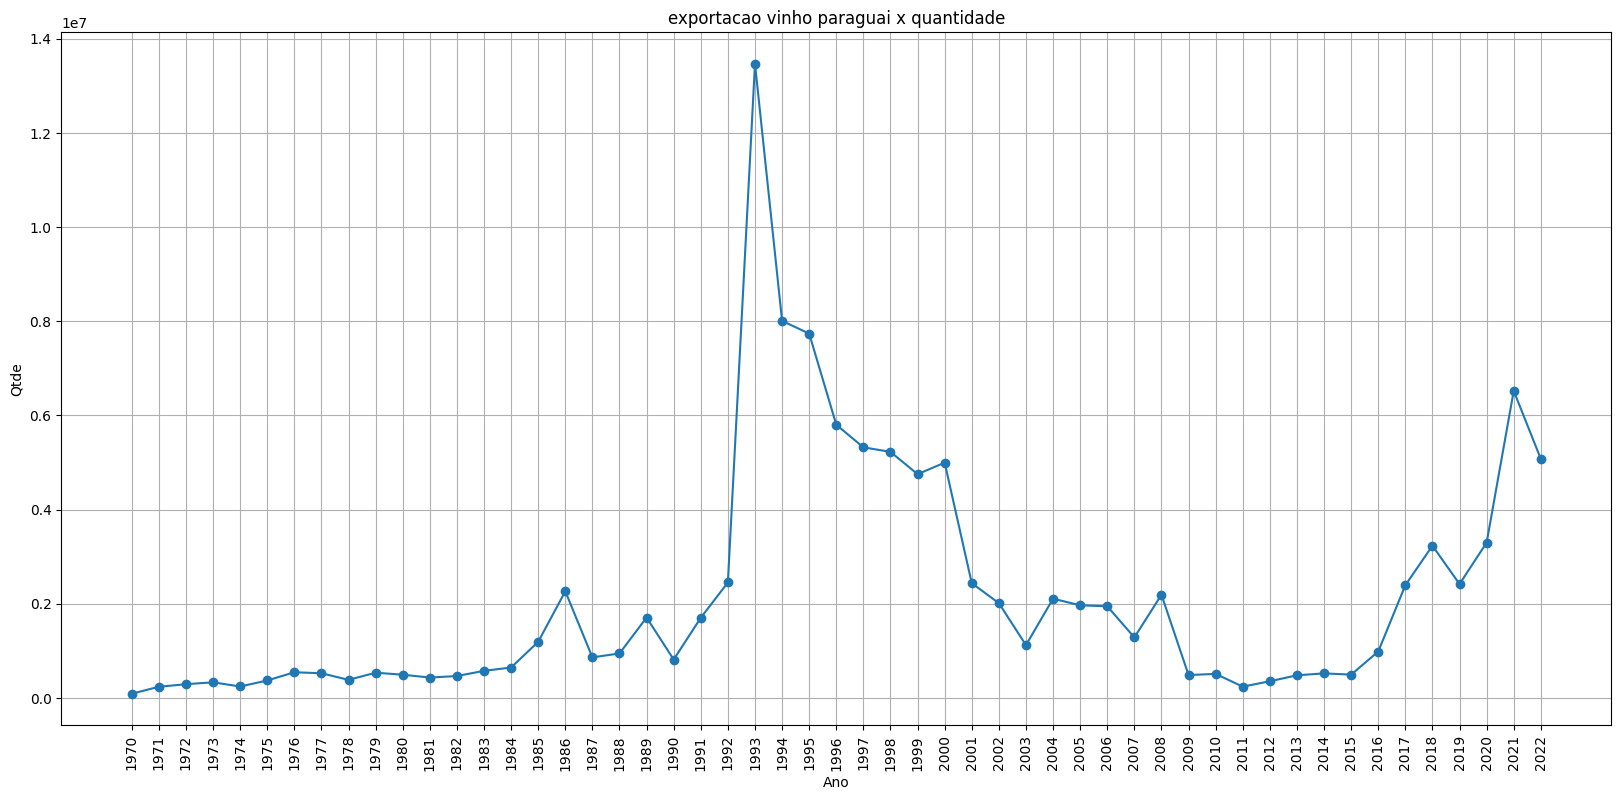

In [10]:
plt.figure(figsize=(20, 9))
plt.plot(df_paraquai_qtd.index, df_paraquai_qtd['Paraguai'], marker='o')
plt.xticks(rotation=90)
plt.grid(True)
plt.title('exportacao vinho paraguai x quantidade')
plt.xlabel('Ano')
plt.ylabel('Qtde')
plt.show()

In [77]:
df_exp_vinho_paraguai_valor = df_exp_vinho_qtde.loc[df_exp_vinho_qtde['País'] == 'Paraguai', :]
df_exp_vinho_paraguai_valor = df_exp_vinho_paraguai_valor.iloc[:, :-2]
df_exp_vinho_paraguai_valor = df_exp_vinho_paraguai_valor.set_index('País')
colunas_valor = [col for col in df_exp_vinho_qtde.columns if col.endswith('.1')]
df_exp_vinho_paraguai_valor = df_exp_vinho_paraguai_valor[colunas_valor]
df_exp_vinho_paraguai_valor = df_exp_vinho_paraguai_valor.T
df_exp_vinho_paraguai_valor.head()

País,Paraguai
1970.1,23980
1971.1,64075
1972.1,84402
1973.1,115041
1974.1,119429


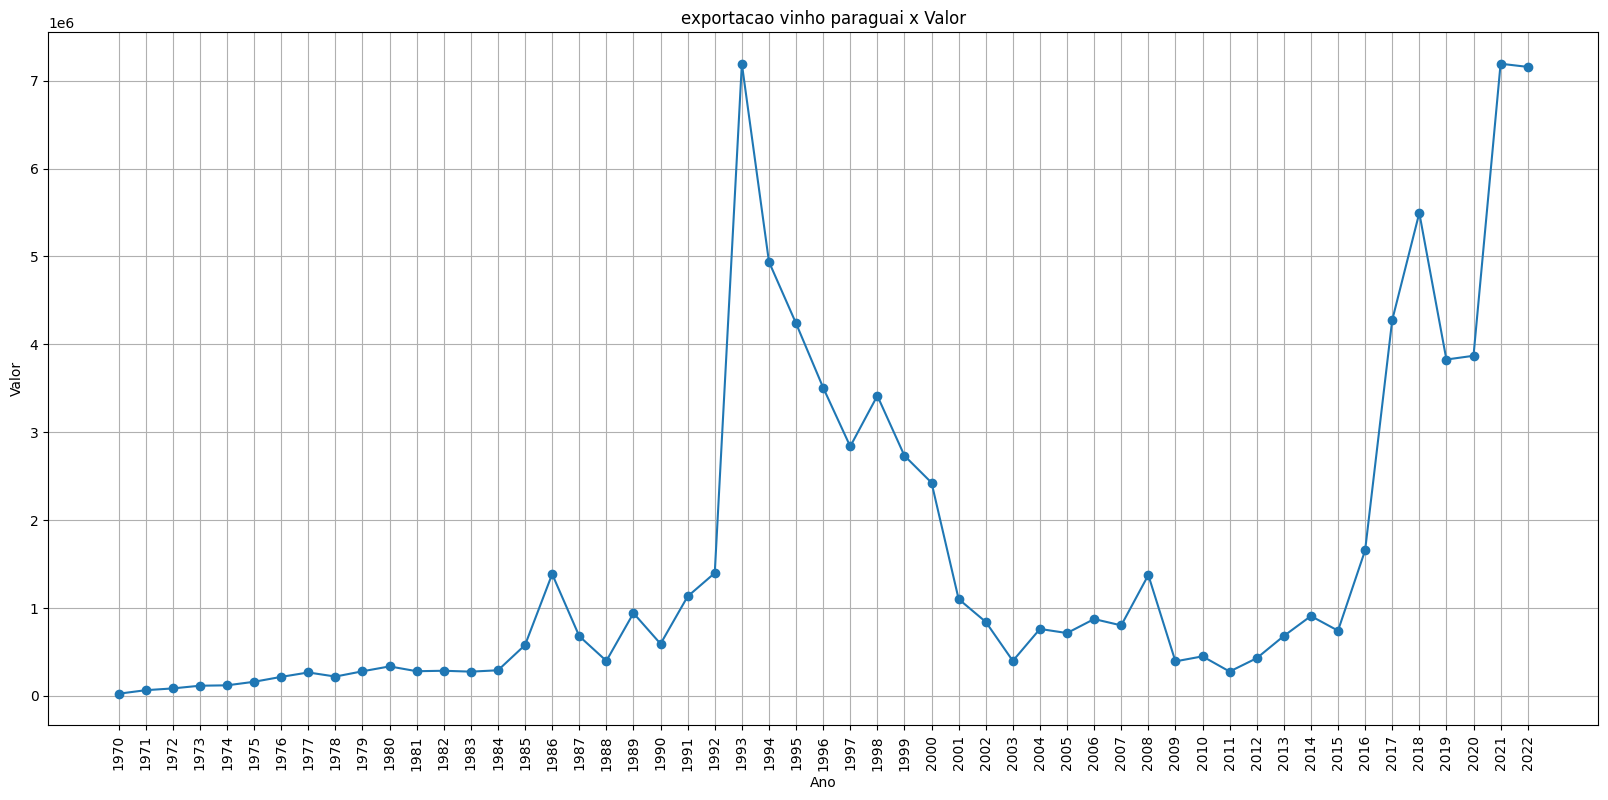

In [11]:
plt.figure(figsize=(20, 9))
plt.plot(df_paraquai_valor.index, df_paraquai_valor['Paraguai'], marker='o')
plt.xticks(rotation=90)
plt.grid(True)
plt.title('exportacao vinho paraguai x Valor')
plt.xlabel('Ano')
plt.ylabel('Valor')
plt.show()

C:\Users\leandro.alves\AppData\Local\Temp\ipykernel_4792\3838194382.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


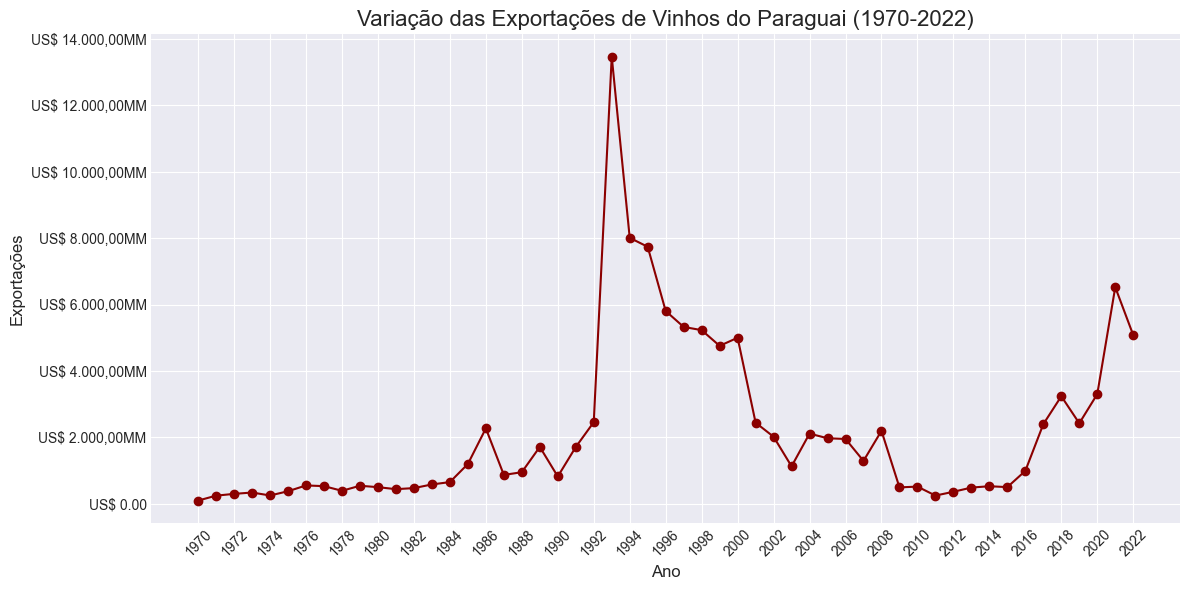

In [19]:
# Configurando o estilo do gráfico
# plt.style.use('seaborn-darkgrid')
plt.style.use('seaborn-darkgrid')

# Convertendo os índices para inteiros
df_paraquai_qtd.index = df_paraquai_qtd.index.map(int)

def formatar_como_moeda(valor, divisor_casas=1):
    # Ajuste da formatação de moeda
    valor_formatado = valor / divisor_casas
    if valor_formatado >= 1000:
        valor_formatado = valor_formatado / 1000  # Convertendo para bilhões ou milhões
        return f'US$ {valor_formatado:,.2f}{"B" if valor >= 1000000000 else "MM"}'.replace(',', 'X').replace('.', ',').replace('X', '.')
    else:
        return f'US$ {valor_formatado:,.2f}'

# Criando o gráfico novamente com a formatação personalizada no eixo Y
plt.figure(figsize=(12, 6))
plt.plot(df_paraquai_qtd.index, df_paraquai_qtd['Paraguai'], color='darkred', marker='o')

plt.title('Variação das Exportações de Vinhos do Paraguai (1970-2022)', fontsize=16)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Exportações', fontsize=12)

plt.xticks(range(df_paraquai_qtd.index.min(), df_paraquai_qtd.index.max()+1, 2), rotation=45)

# Aplicando a função de formatação ao eixo Y
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: formatar_como_moeda(x)))

plt.grid(True)
plt.tight_layout()
plt.show()


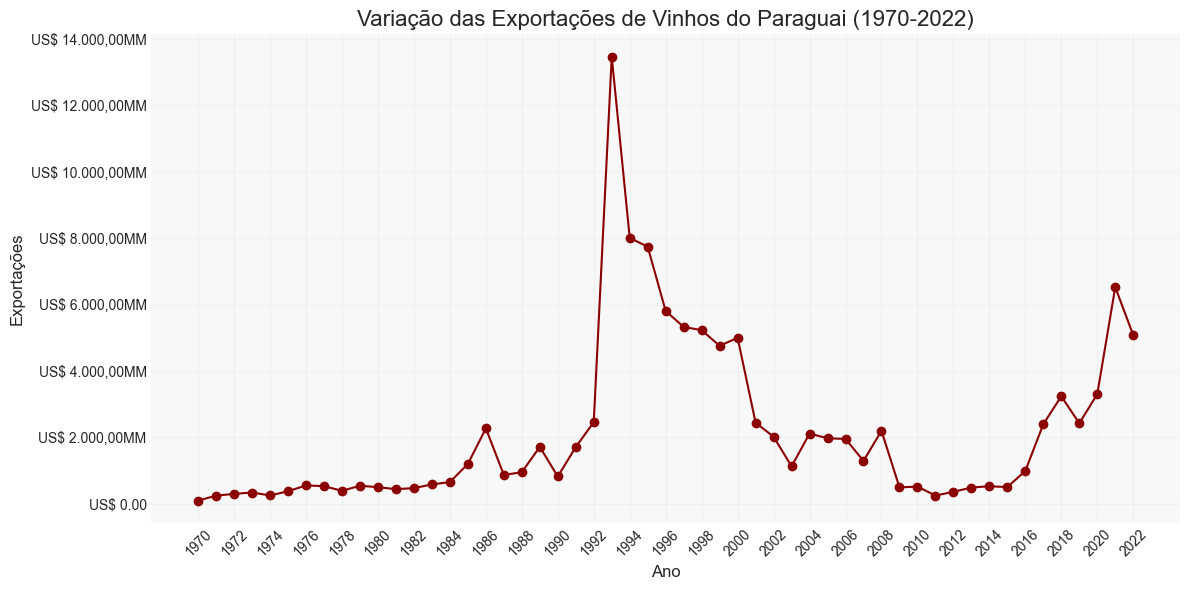

In [20]:

# Convertendo os índices para inteiros
df_paraquai_qtd.index = df_paraquai_qtd.index.map(int)

def formatar_como_moeda(valor, divisor_casas=1):
    # Ajuste da formatação de moeda
    valor_formatado = valor / divisor_casas
    if valor_formatado >= 1000:
        valor_formatado = valor_formatado / 1000  # Convertendo para bilhões ou milhões
        return f'US$ {valor_formatado:,.2f}{"B" if valor >= 1000000000 else "MM"}'.replace(',', 'X').replace('.', ',').replace('X', '.')
    else:
        return f'US$ {valor_formatado:,.2f}'


# Criando o gráfico novamente com a cor de fundo do grid alterada
plt.figure(figsize=(12, 6))
plt.plot(df_paraquai_qtd.index, df_paraquai_qtd['Paraguai'], color='darkred', marker='o')

plt.title('Variação das Exportações de Vinhos do Paraguai (1970-2022)', fontsize=16)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Exportações', fontsize=12)

plt.xticks(range(df_paraquai_qtd.index.min(), df_paraquai_qtd.index.max()+1, 2), rotation=45)

# Aplicando a função de formatação ao eixo Y
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: formatar_como_moeda(x)))

# Alterando a cor de fundo do grid
plt.grid(True, color='#f0f0f0')

# Alterando a cor de fundo do espaço do gráfico
plt.gca().set_facecolor('#f8f8f8')

plt.tight_layout()
plt.show()



#### Estados Unidos

In [29]:
df_usa_qtd = df_exp_vinho_tab.loc[df_exp_vinho_tab['classe'] == 'quantidade'][['Estados Unidos']]

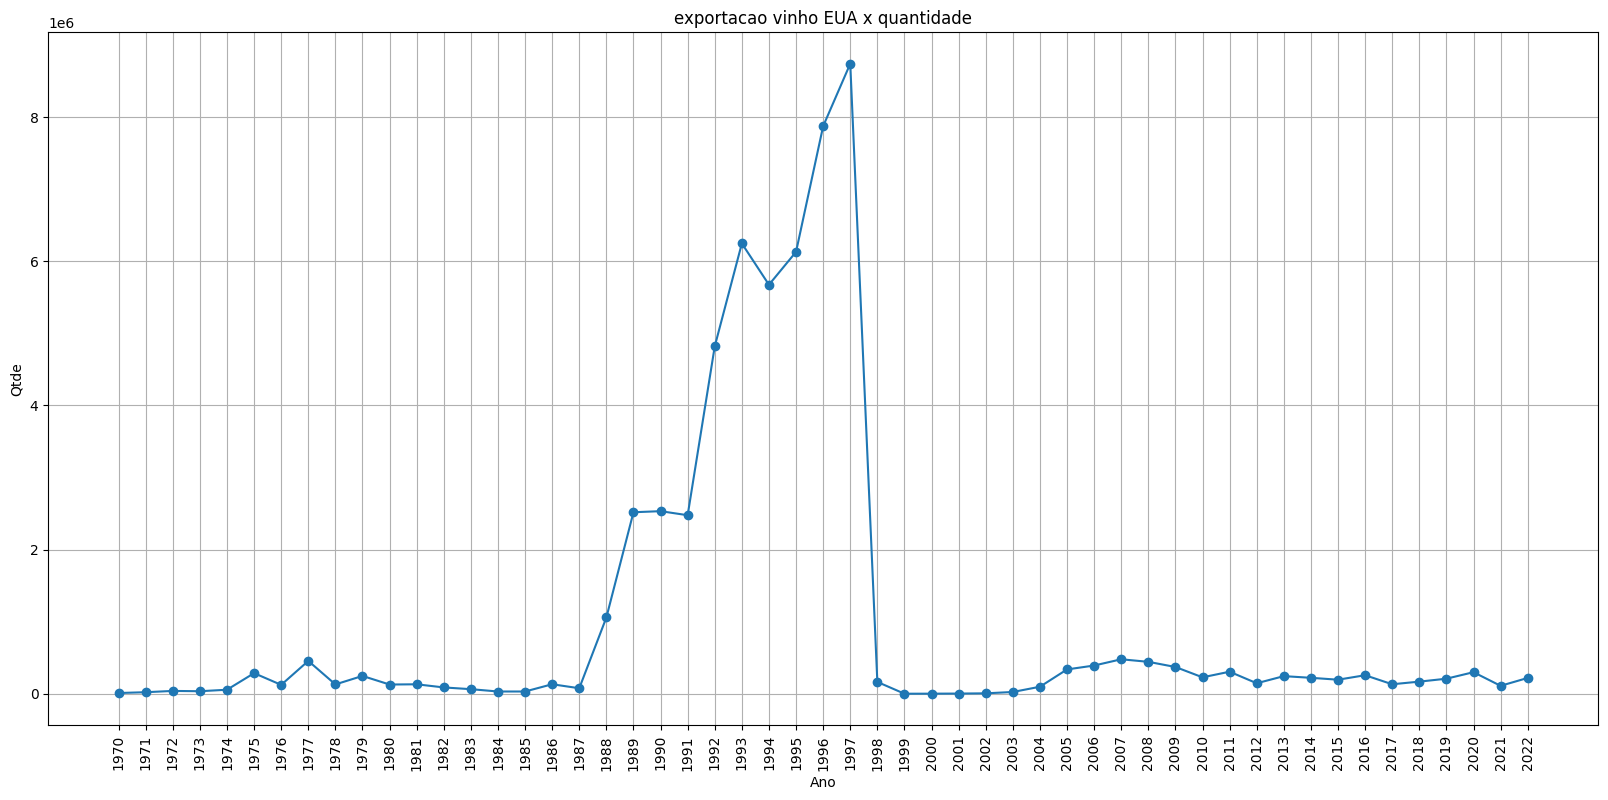

In [30]:
plt.figure(figsize=(20, 9))
plt.plot(df_usa_qtd.index, df_usa_qtd['Estados Unidos'], marker='o')
plt.xticks(rotation=90)
plt.grid(True)
plt.title('exportacao vinho EUA x quantidade')
plt.xlabel('Ano')
plt.ylabel('Qtde')
plt.show()

In [31]:
df_usa_valor = df_exp_vinho_tab.loc[df_exp_vinho_tab['classe'] == 'valor'][['Estados Unidos']]

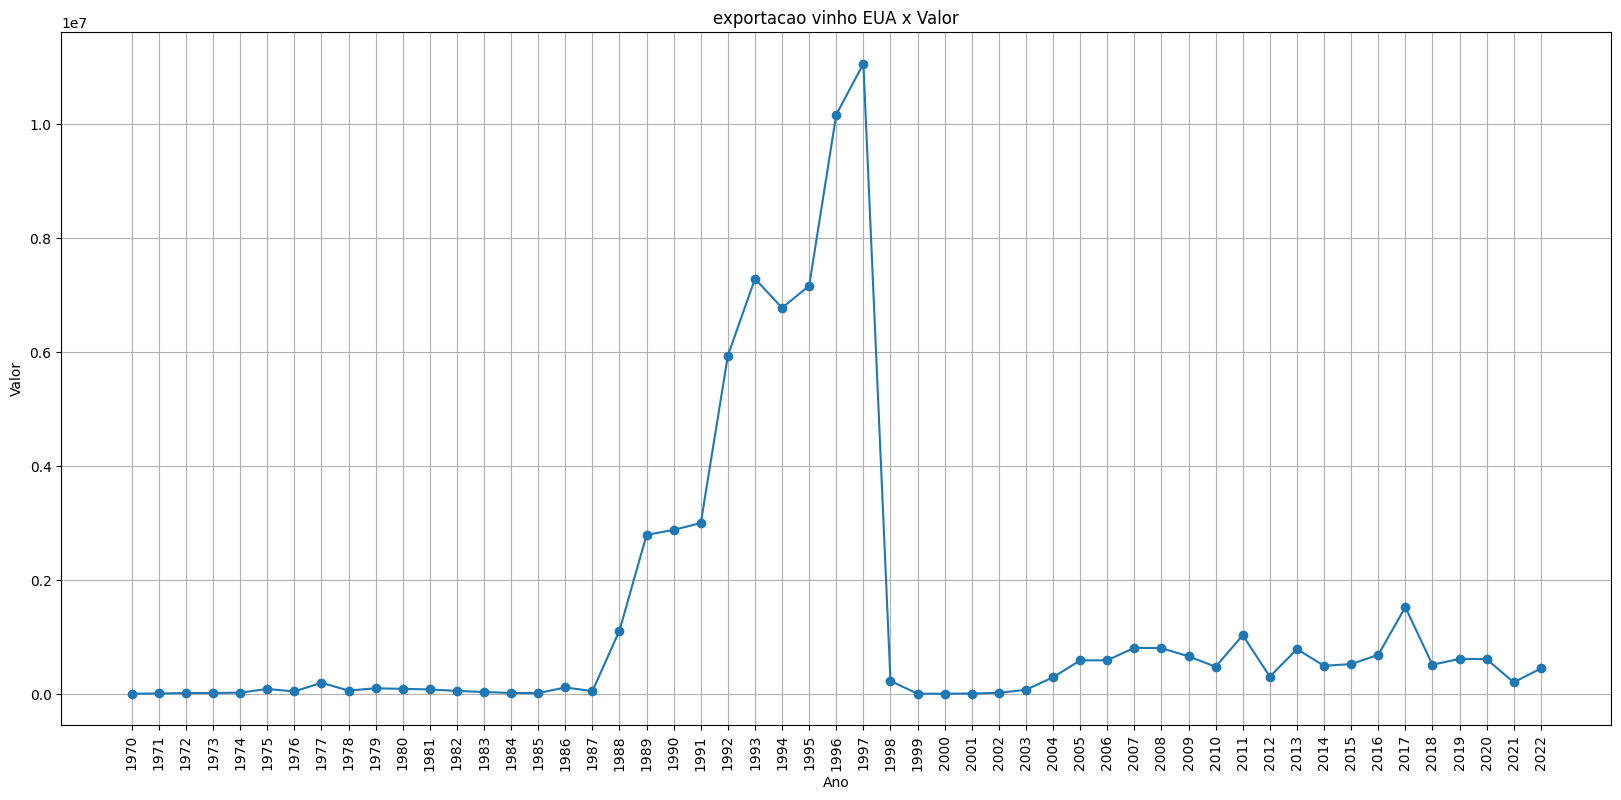

In [32]:
plt.figure(figsize=(20, 9))
plt.plot(df_usa_valor.index, df_usa_valor['Estados Unidos'], marker='o')
plt.xticks(rotation=90)
plt.grid(True)
plt.title('exportacao vinho EUA x Valor')
plt.xlabel('Ano')
plt.ylabel('Valor')
plt.show()

#### Rússia

In [37]:
df_rusia_qtd = df_exp_vinho_tab.loc[df_exp_vinho_tab['classe'] == 'quantidade'][['Rússia']]

In [38]:
df_rusia_valor = df_exp_vinho_tab.loc[df_exp_vinho_tab['classe'] == 'valor'][['Rússia']]

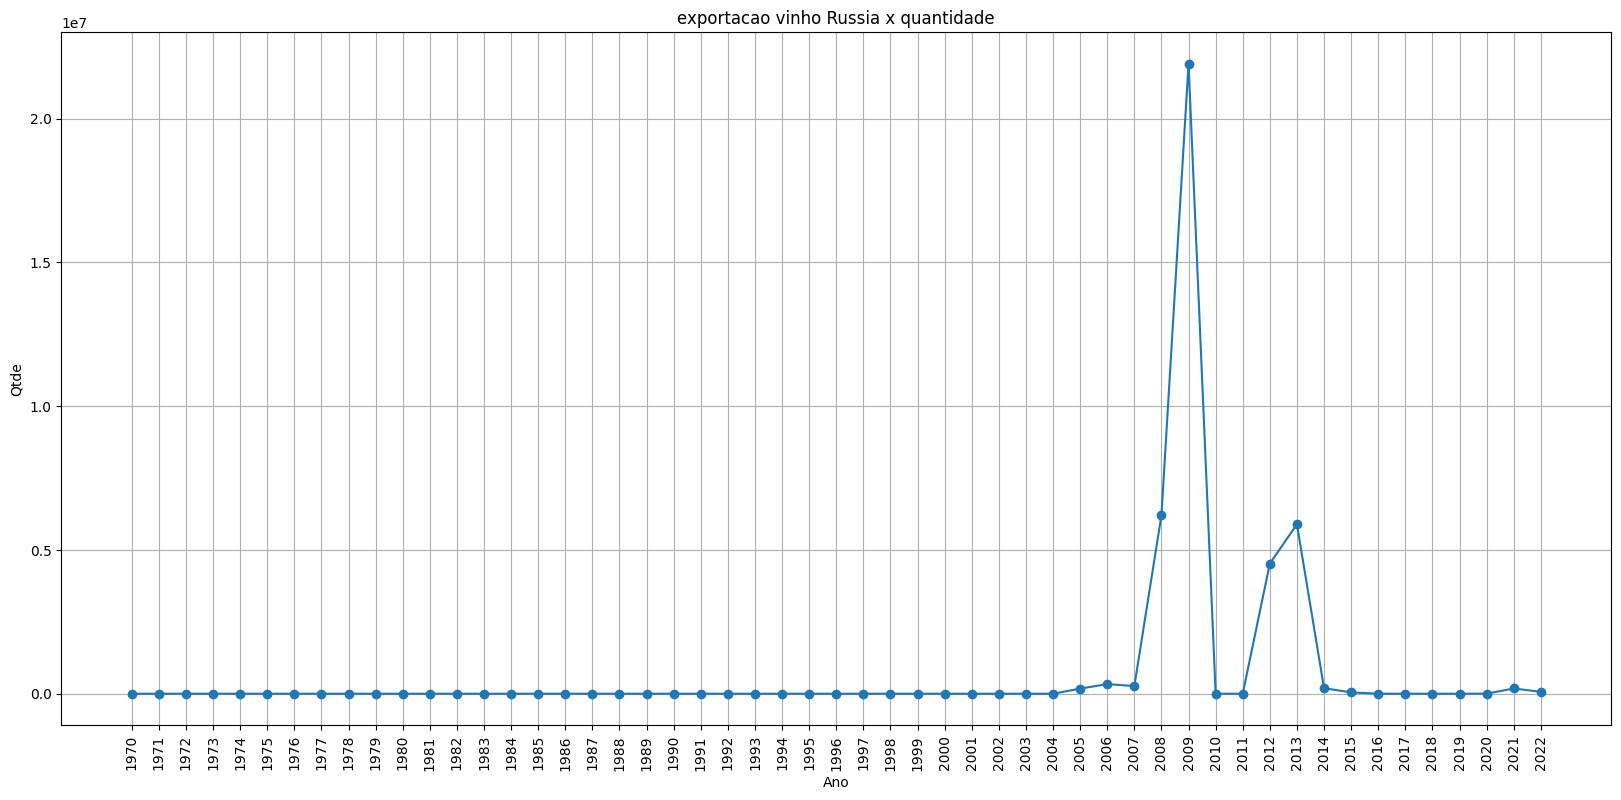

In [39]:
plt.figure(figsize=(20, 9))
plt.plot(df_rusia_qtd.index, df_rusia_qtd['Rússia'], marker='o')
plt.xticks(rotation=90)
plt.grid(True)
plt.title('exportacao vinho Russia x quantidade')
plt.xlabel('Ano')
plt.ylabel('Qtde')
plt.show()

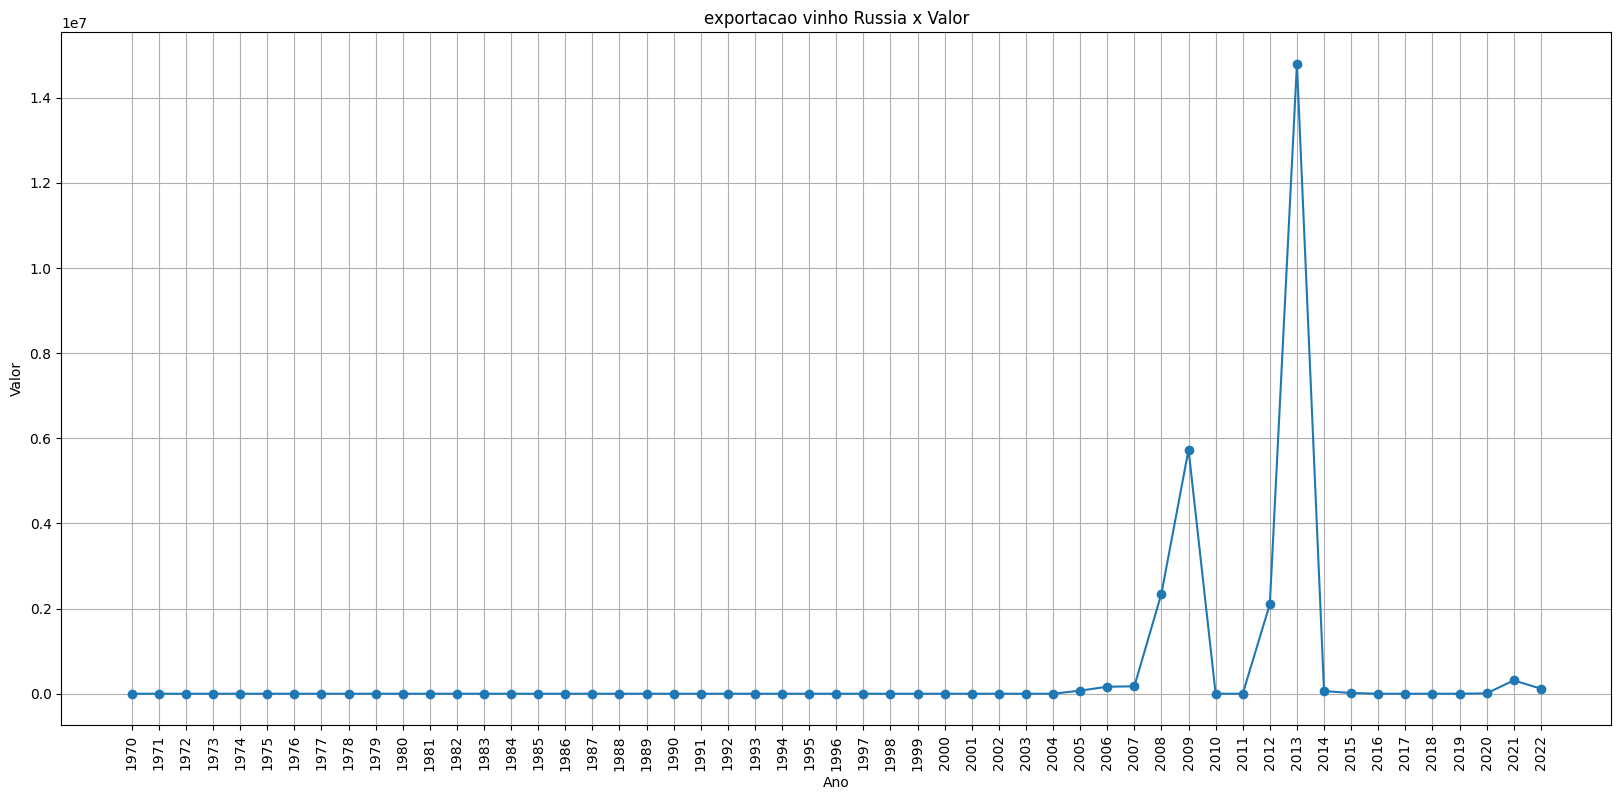

In [40]:
plt.figure(figsize=(20, 9))
plt.plot(df_rusia_valor.index, df_rusia_valor['Rússia'], marker='o')
plt.xticks(rotation=90)
plt.grid(True)
plt.title('exportacao vinho Russia x Valor')
plt.xlabel('Ano')
plt.ylabel('Valor')
plt.show()

#### Japão

In [41]:
df_jp_qtd = df_exp_vinho_tab.loc[df_exp_vinho_tab['classe'] == 'quantidade'][['Japão']]

In [42]:
df_jp_valor = df_exp_vinho_tab.loc[df_exp_vinho_tab['classe'] == 'valor'][['Japão']]

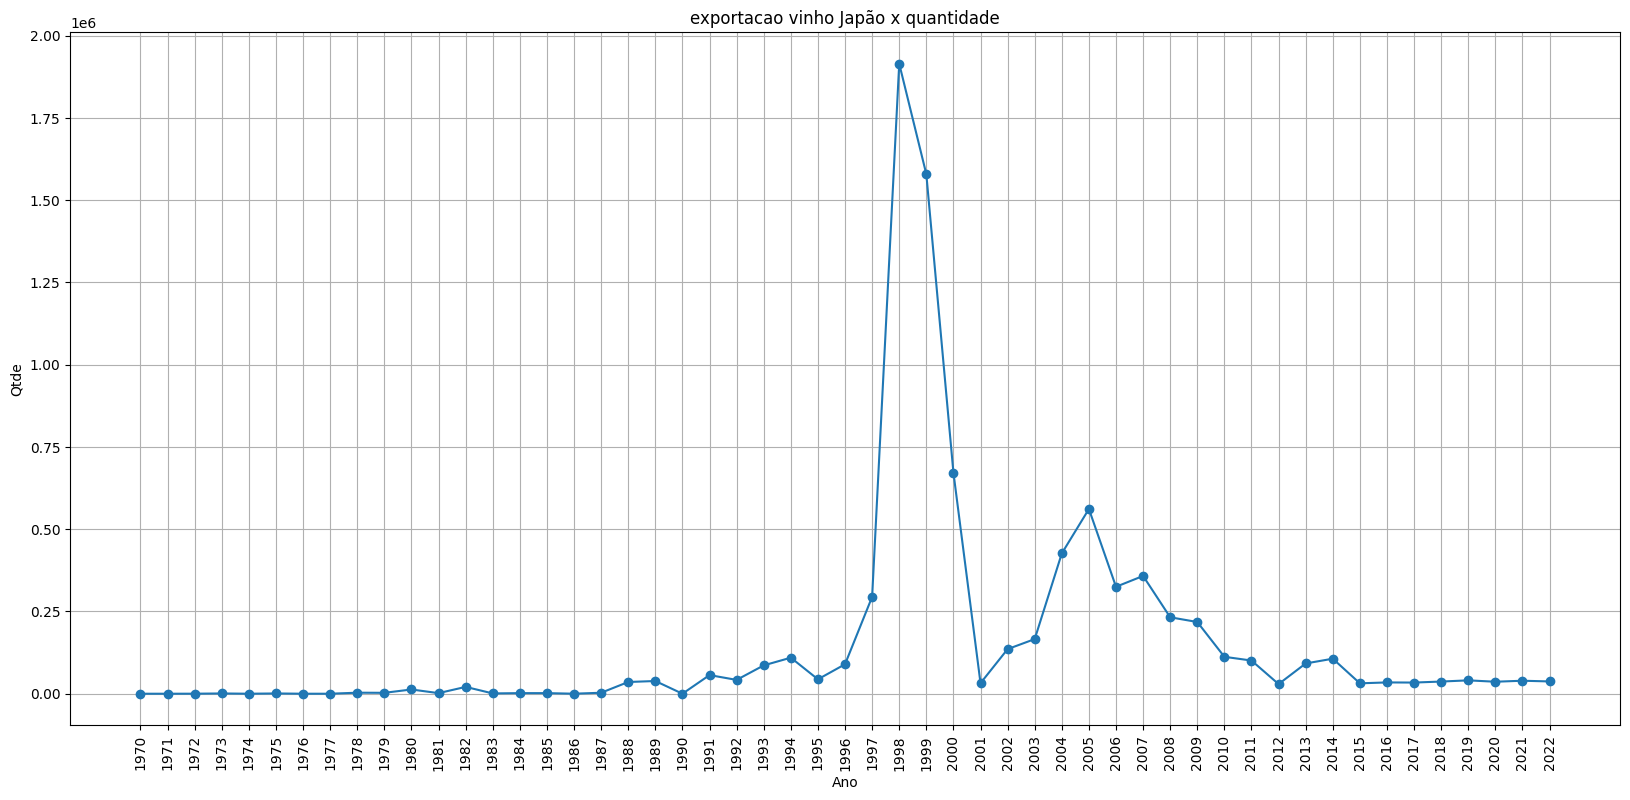

In [43]:
plt.figure(figsize=(20, 9))
plt.plot(df_jp_qtd.index, df_jp_qtd['Japão'], marker='o')
plt.xticks(rotation=90)
plt.grid(True)
plt.title('exportacao vinho Japão x quantidade')
plt.xlabel('Ano')
plt.ylabel('Qtde')
plt.show()

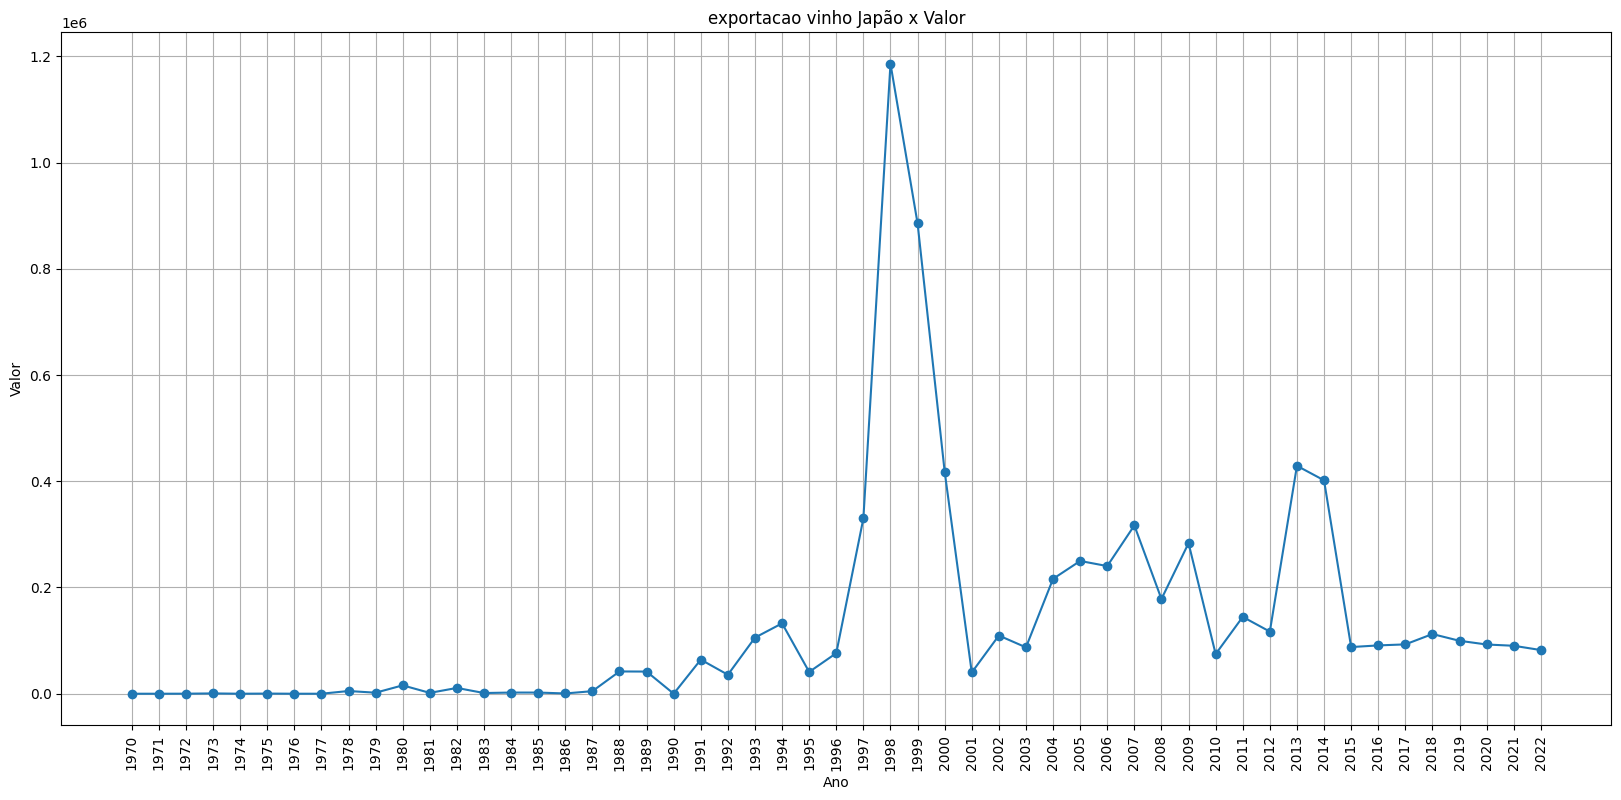

In [44]:
plt.figure(figsize=(20, 9))
plt.plot(df_jp_valor.index, df_jp_valor['Japão'], marker='o')
plt.xticks(rotation=90)
plt.grid(True)
plt.title('exportacao vinho Japão x Valor')
plt.xlabel('Ano')
plt.ylabel('Valor')
plt.show()

#### China

In [45]:
df_china_qtd = df_exp_vinho_tab.loc[df_exp_vinho_tab['classe'] == 'quantidade'][['China']]

In [46]:
df_china_valor = df_exp_vinho_tab.loc[df_exp_vinho_tab['classe'] == 'valor'][['China']]

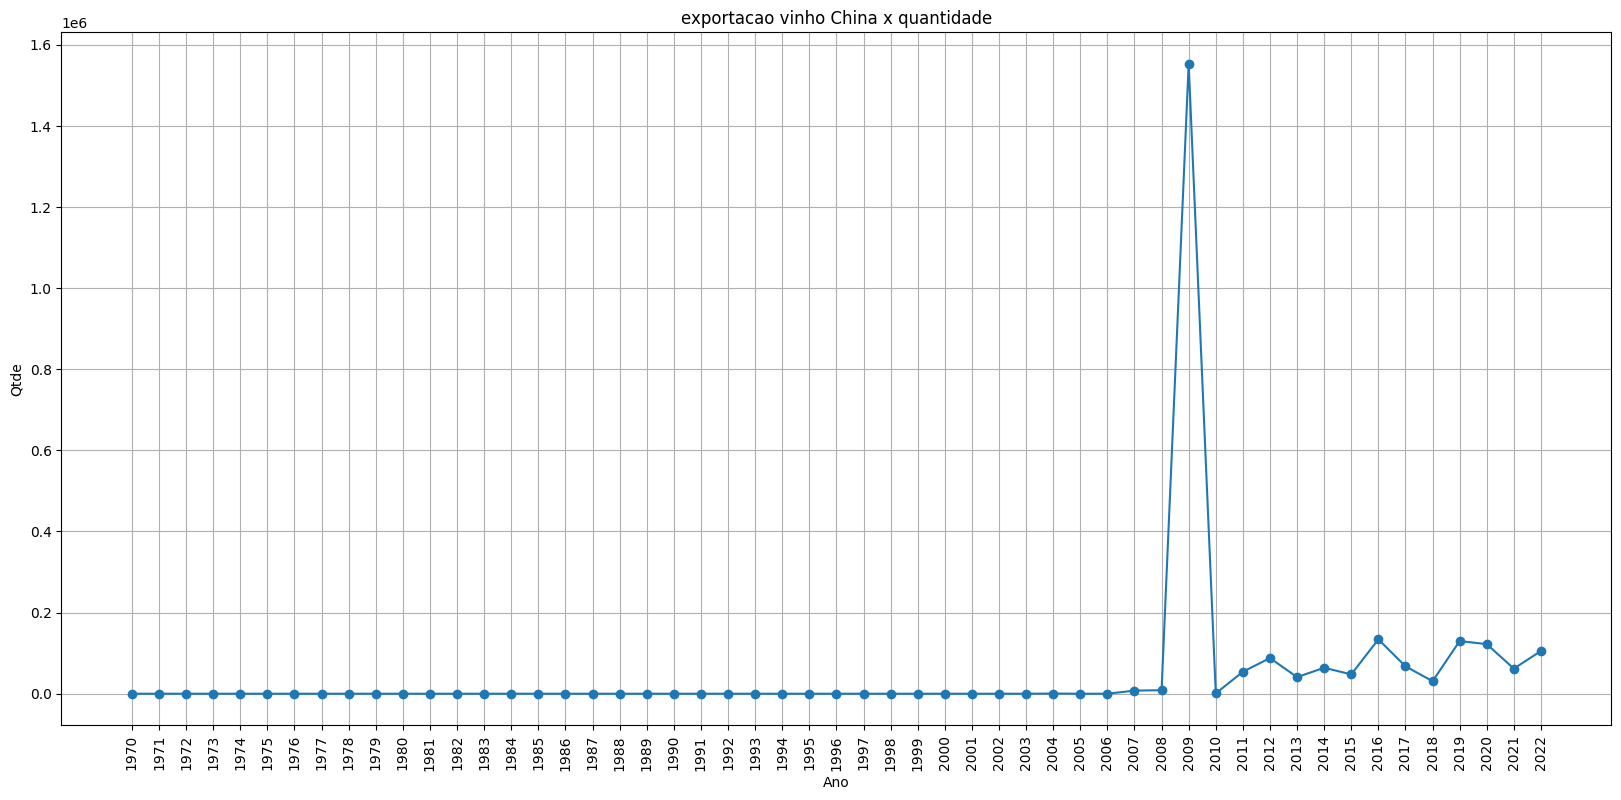

In [48]:
plt.figure(figsize=(20, 9))
plt.plot(df_china_qtd.index, df_china_qtd['China'], marker='o')
plt.xticks(rotation=90)
plt.grid(True)
plt.title('exportacao vinho China x quantidade')
plt.xlabel('Ano')
plt.ylabel('Qtde')
plt.show()

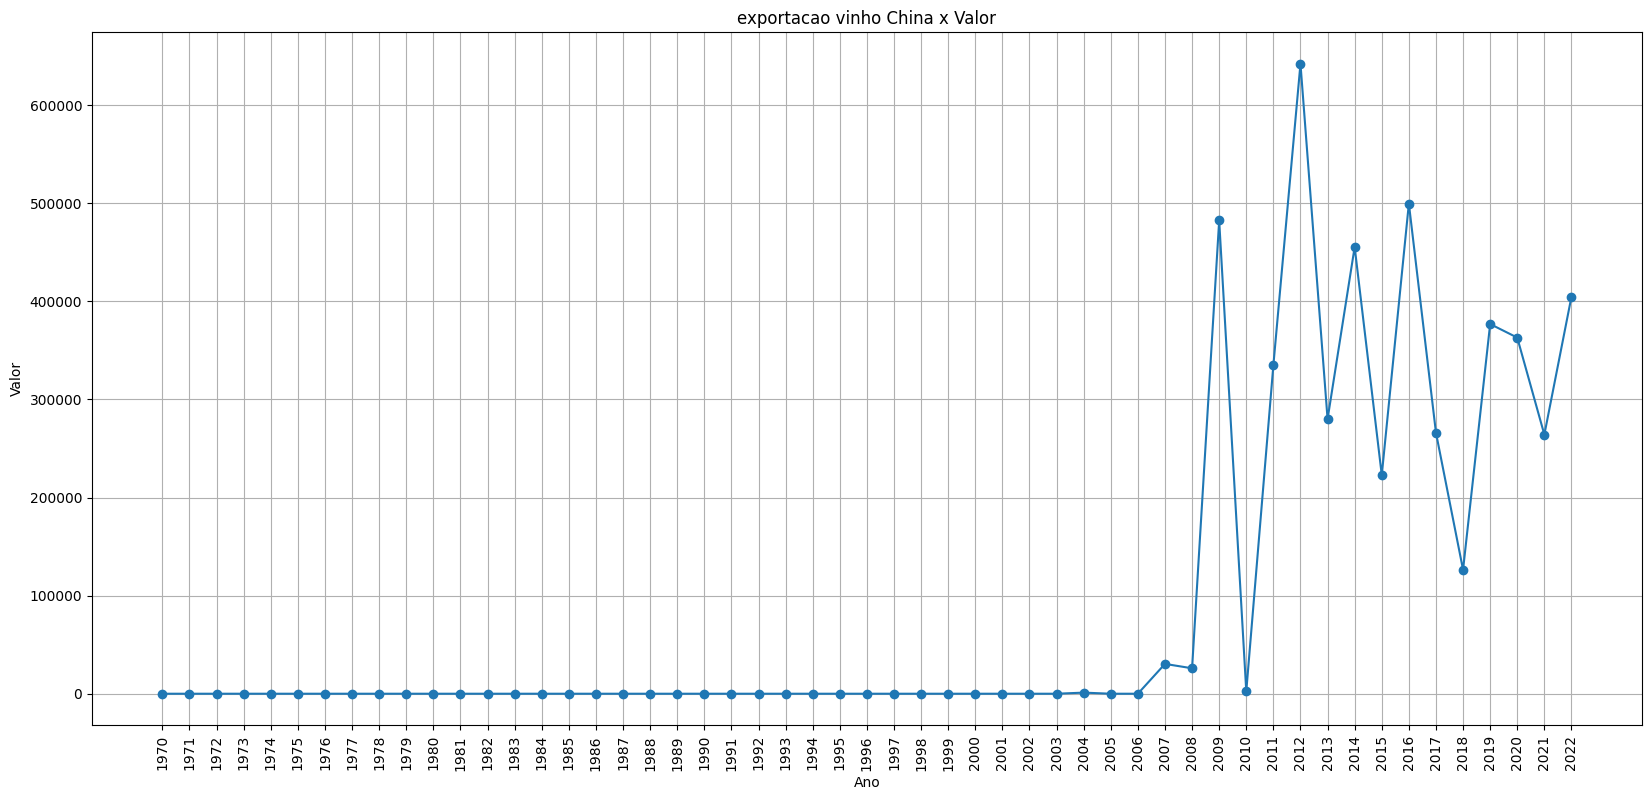

In [49]:
plt.figure(figsize=(20, 9))
plt.plot(df_china_valor.index, df_china_valor['China'], marker='o')
plt.xticks(rotation=90)
plt.grid(True)
plt.title('exportacao vinho China x Valor')
plt.xlabel('Ano')
plt.ylabel('Valor')
plt.show()

#### VINHO ORGÂNICO

<function matplotlib.pyplot.show(close=None, block=None)>

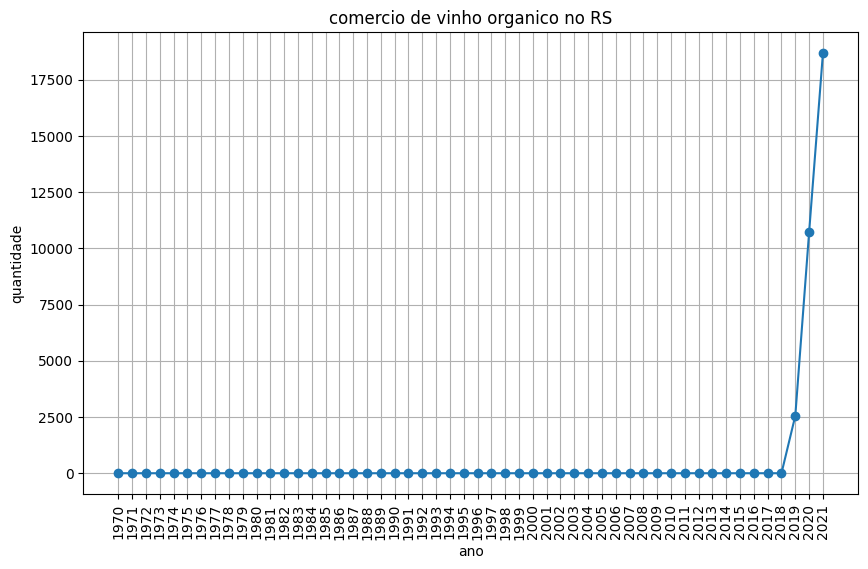

In [18]:
df_comercio_vinho_grafico_organico = df_comercio_vinho.transpose()
df_comercio_vinho_grafico_organico = df_comercio_vinho_grafico_organico.iloc[:, :15]

df_comercio_vinho_grafico_organico['Total Vinho'] = df_comercio_vinho_grafico_organico['VINHO ORGÂNICO']

plt.figure(figsize=(10, 6))
plt.plot(df_comercio_vinho_grafico_organico.index, df_comercio_vinho_grafico_organico['Total Vinho'], marker='o')
plt.xticks(rotation=90)
plt.grid(True)
plt.title('comercio de vinho organico no RS')
plt.xlabel('ano')
plt.ylabel('quantidade')
plt.show

<ipython-input-21-fa081e87c352>:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_exp_vinho_final['media'] = df_exp_vinho_final[['País','1970','1971','1972','1973','1974','1975','1976','1977','1978','1979','1980','1981','1982',
<ipython-input-21-fa081e87c352>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_exp_vinho_final['media'] = df_exp_vinho_final[['País','1970','1971','1972','1973','1974','1975','1976','1977','1978','1979','1980','1981','1982',
<ipython-input-21-fa081e87c352>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

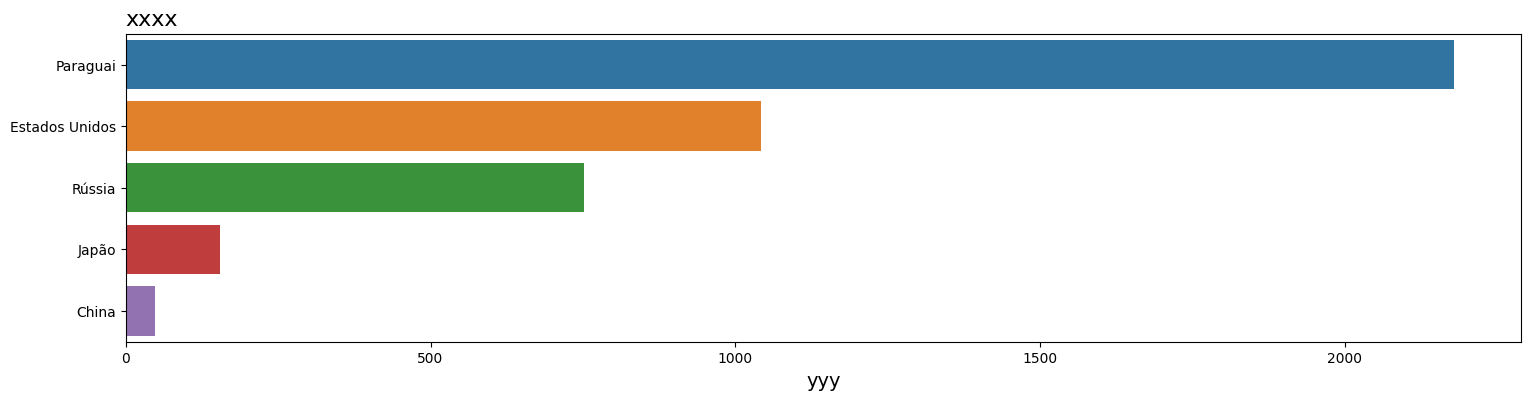

In [21]:
df_exp_vinho_final = df_exp_vinho.loc[df_exp_vinho['País'].isin(['Paraguai','Estados Unidos','Rússia','Japão','China'])]

df_exp_vinho_final['media'] = df_exp_vinho_final[['País','1970','1971','1972','1973','1974','1975','1976','1977','1978','1979','1980','1981','1982',
'1983','1984','1985','1986','1987','1988','1989','1990','1991','1992','1993','1994','1995','1996','1997','1998','1999','2000','2001',
'2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019',
'2020','2021','2022']].mean(axis=1)

df_exp_vinho_final2 = df_exp_vinho_final[['País','media']]
#df_exp_vinho_final2['media'] = df_exp_vinho_final2['media'].map('{:.2f}'.format)
df_exp_vinho_final2['media'] = df_exp_vinho_final2['media'].astype(int)/1000
df_exp_vinho_final2.set_index('País', inplace=True)
df_exp_vinho_final2 = df_exp_vinho_final2.sort_values(by='media', ascending=False)




fig, ax = plt.subplots(figsize=(18,4))
ax = sns.barplot(data=df_exp_vinho_final2, y=df_exp_vinho_final2.index, x='media', orient='h')

ax.set_title('xxxx', loc='left', fontsize=16)
ax.set_xlabel('yyy', fontsize=14)
ax.set_ylabel('')
plt.show()

#df_exp_vinho_final2.head()

In [20]:
df_exp_vinho_final2.head()

,media
País,
Paraguai,2180070
Estados Unidos,1042621
Rússia,751094
Japão,154696
China,47500


#### Cotação do Dólar


In [92]:
df_cotacao.head()

,data,cotacao_dolar
0,1994-12-31,0.8510
1,1995-12-31,0.9759
2,1996-12-31,1.0449
3,1997-12-31,1.1218
4,1998-12-31,1.1202


In [131]:
# Supondo que df_cotacao seja o seu DataFrame
df_cotacao['data'] = pd.to_datetime(df_cotacao['data'])

# Criar o gráfico de linha com Plotly Express
fig = px.line(
    df_cotacao,
    x='data',
    y='cotacao_dolar',
    hover_data='cotacao_dolar',
    markers=True,
    labels={'cotacao_dolar': 'Cotação do Dólar'},
    title='Variação da Cotação do Dólar ao Longo dos Anos',
    line_shape='spline',  # Pode ajustar a curvatura da linha (linear, spline, hv, vh, hvh, vhl)
    line_dash_sequence=['solid'],  # Pode ajustar o estilo da linha
    color_discrete_sequence=['#910A67'], # Pode ajustar a cor da linha
    # text='cotacao_dolar'  
)

# Adicionar título e rótulos dos eixos
fig.update_layout(
    xaxis_title='Ano',
    yaxis_title='Cotação do Dólar',
    yaxis_tickprefix='US$ ',  # Adicionar prefixo de dólar nos ticks do eixo Y
    plot_bgcolor="white",
    # Configurar o tamanho da fonte do título
    title_font=dict(size=20),
    
    # Configurar o tamanho da linha
    showlegend=True,  # Se quiser que a legenda mostre a correta
    legend=dict(font=dict(size=20)),  # Tamanho da fonte na legenda

    # Configurar a cor de fundo
    # paper_bgcolor='#DCF2F1',  # ajustar para a cor desejada
    # paper_bgcolor='#000000',  # ajustar para a cor desejada
    
    # Configurar a cor das linhas do grid no eixo X e Y
    # xaxis=dict(gridcolor='red'),  # ajustar para a cor desejada
    yaxis=dict(gridcolor='#3B3486'),  # ajustar para a cor desejada
)

# Configurar o tamanho da linha
fig.update_traces(
    line=dict(width=4),  # ajustar para o tamanho desejado
    marker=dict(size=8),  # ajustar para o tamanho desejado dos marcadores
)

# Exibir o gráfico
fig.show()